<a href="https://colab.research.google.com/github/LuisHTB/IT304-Grupo5/blob/main/Grupo_5_UFRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding:

In [2]:
!git clone https://github.com/LuisHTB/IT304-Grupo5.git

Cloning into 'IT304-Grupo5'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [35]:
import pandas as pd

abas_de_excel =  pd.ExcelFile("/content/IT304-Grupo5/Contas de energia UFRJ.xlsx")
abas_de_excel.sheet_names

UC1 = abas_de_excel.parse("UC1")
UC1.shape

UC1.head()

DATA   ANO        MÊS  ...  TAR_ULTRAPASSAG  REAT_KVAR_NP  TAR_REAT_NP
0 2017-01-19  2017    Janeiro  ...              NaN           NaN          NaN
1 2017-02-18  2017  Fevereiro  ...              NaN           NaN          NaN
2 2017-03-22  2017      Março  ...              NaN           NaN          NaN
3 2017-04-22  2017      Abril  ...              NaN           NaN          NaN
4 2017-05-23  2017       Maio  ...              NaN           NaN          NaN

[5 rows x 46 columns]

# Data Preparation:

In [36]:
import numpy as np

data = []
for colm in UC1.columns[3:]:
  data.append([colm, UC1.shape[0]-UC1[colm].apply(np.isnan).sum(), UC1[colm].apply(np.isnan).sum(), (UC1[colm].apply(np.isnan).sum()/36)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

Variavel  ...  Percentagem de Dados Faltantes
0                 TX VISITA TÉCNICA UC-GA  ...                         100.00%
1                                    ICMS  ...                         100.00%
2                            REAT_KVAR_NP  ...                         100.00%
3                         TAR_ULTRAPASSAG  ...                         100.00%
4                     DEMANDA_ULTRAPASSAG  ...                         100.00%
5                 Indenização Mensal DMIC  ...                         100.00%
6                      TAR_REATIVA_EXC_FP  ...                         100.00%
7                  DEMANDA_REATIVA_EXC_FP  ...                         100.00%
8                 TAR_DEMANDA_FP_SEM ICMS  ...                         100.00%
9            DEMANDA_FATURADA_FP SEM ICMS  ...                         100.00%
10         TAXA DESLG OU RELIG PROGRAMADA  ...                         100.00%
11                            TAR_REAT_NP  ...                         100.00%
12                     TAR_ULTRAPASSAG_FP  ...                         100.00%
13                 DEMANDA_ULTRAPASSAG_FP  ...                         100.00%
14  Dév. Importe faturado a maior s/ icms  ...                         100.00%
15         Retenção  de Tributos Federais  ...                         100.00%
16                                 Ajuste  ...                         100.00%
17                          TAR_TUSD_KW_P  ...                         100.00%
18                       Acrescimo_Bverm2  ...                          77.78%
19                       Acrescimo_Bverm1  ...                          66.67%
20                        Acrescimo_Bamar  ...                          52.78%
21                                PERIODO  ...                           2.78%

[22 rows x 4 columns]

## Visualização de Dados Faltantes

In [37]:
import missingno as msno

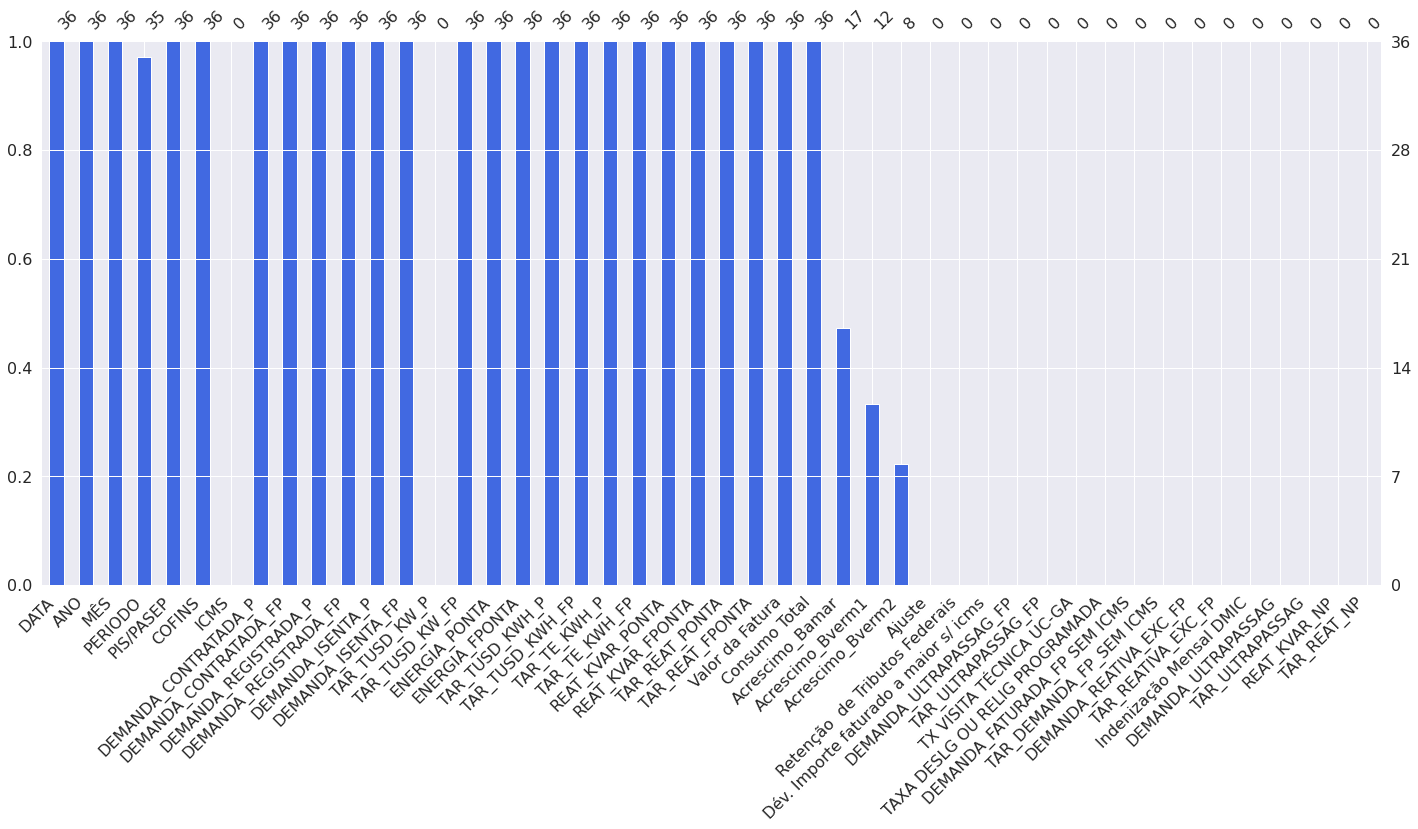

In [38]:
msno.bar(UC1, color="RoyalBlue") #para visualizar a integridade do datafram

## Matriz de Dados Faltantes

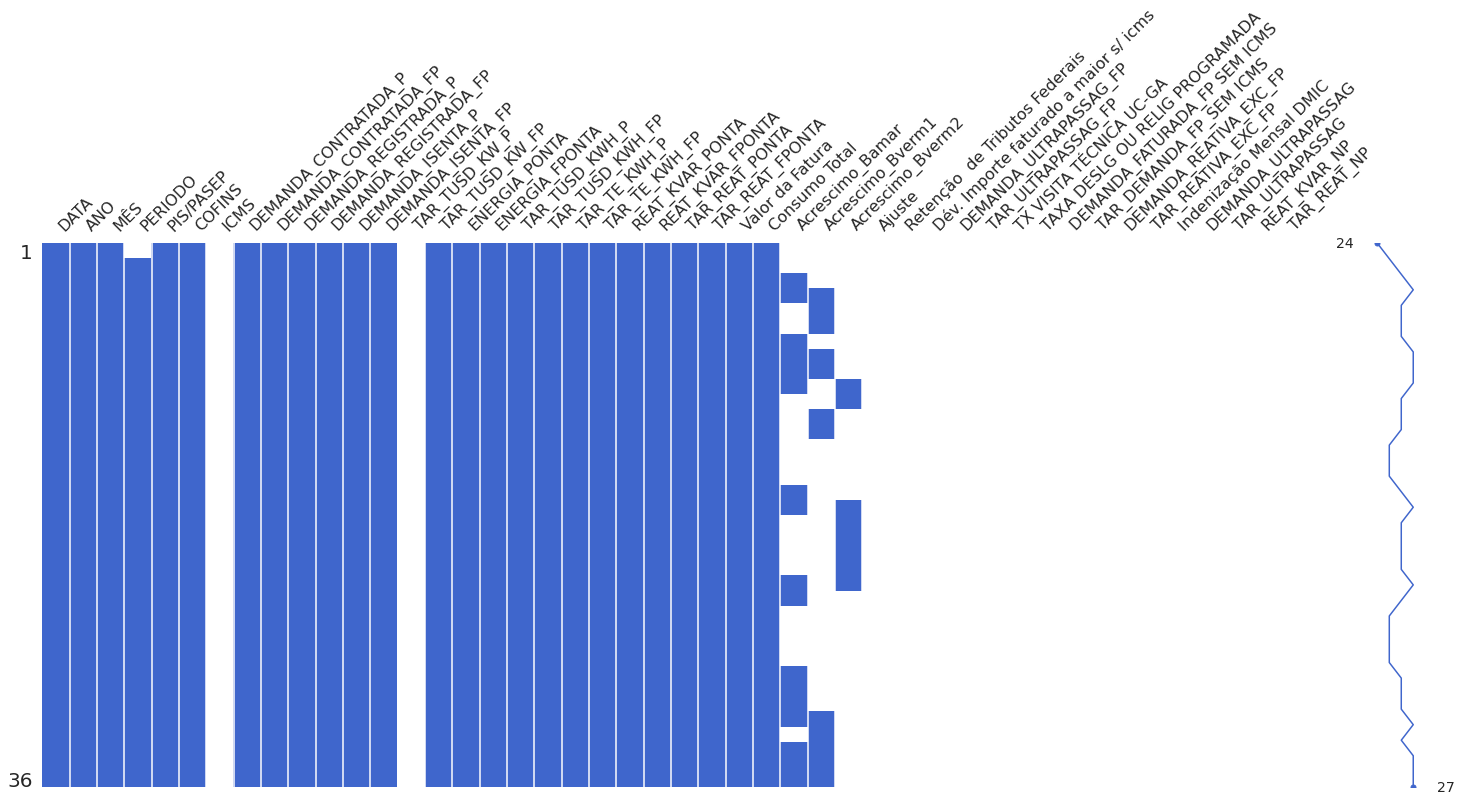

In [39]:
msno.matrix(UC1, color = (0.25,0.4,0.8))

## Matriz de Correlação de Dados Faltantes

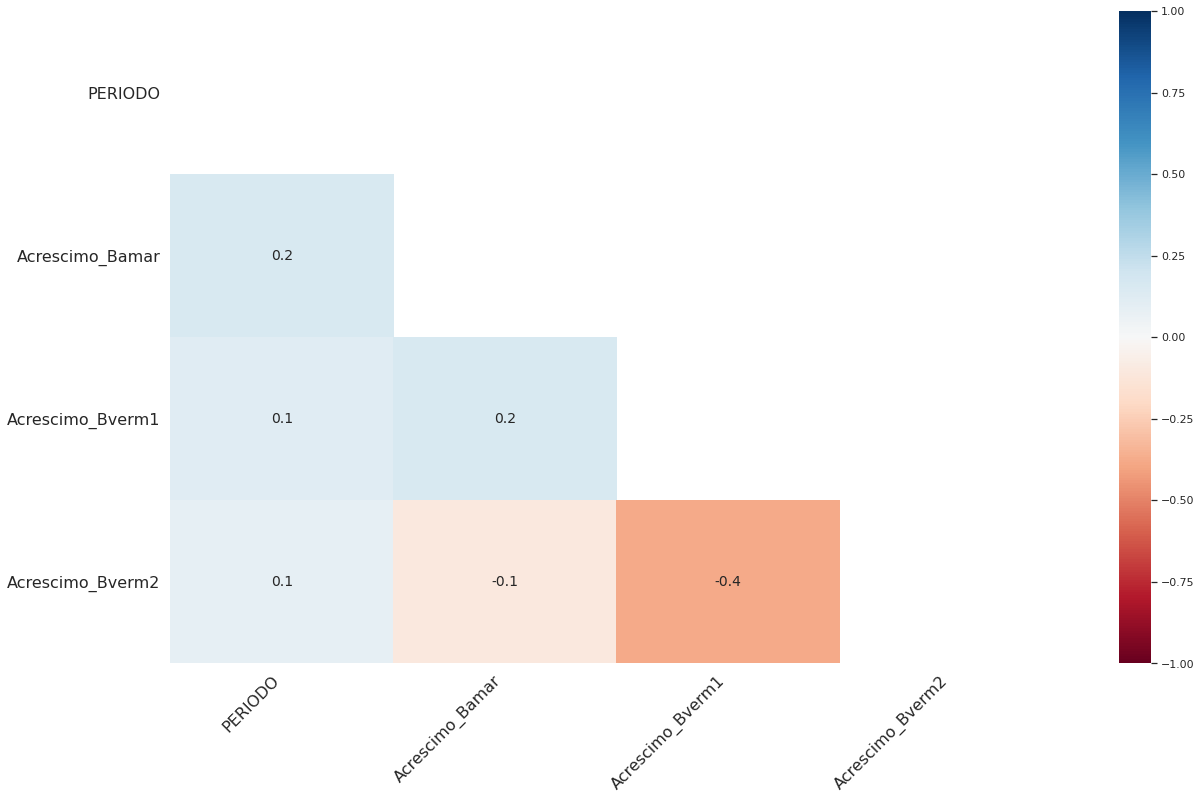

In [40]:
msno.heatmap(UC1)

## Dendogram de dados Faltantes

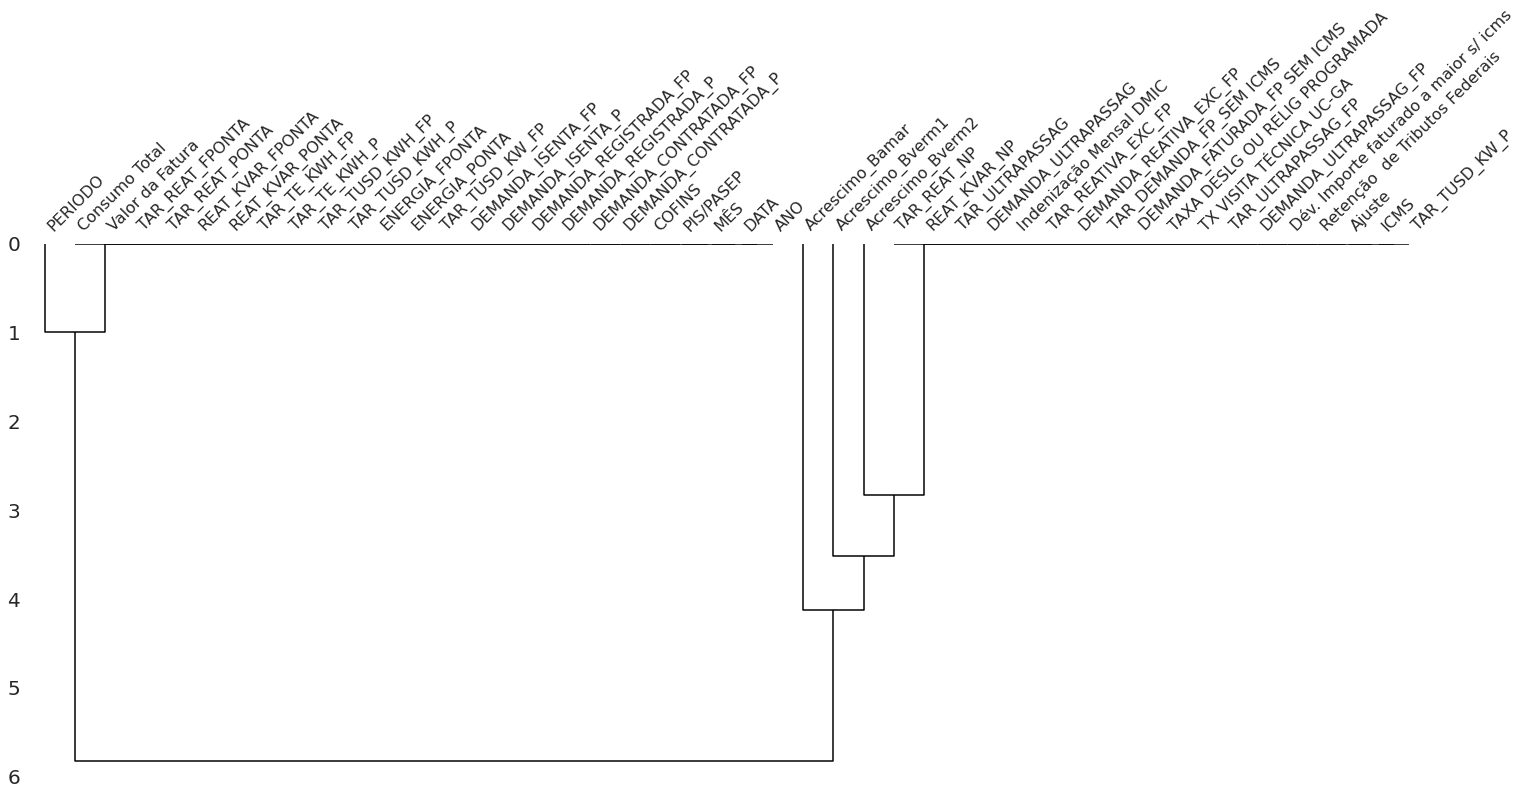

In [41]:
msno.dendrogram(UC1)

## Eliminação de dados Faltantes

# Começa o tratamento dos dados - Data Preparation

In [42]:
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_df.shape

(36, 25)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Visualização de Variaveis

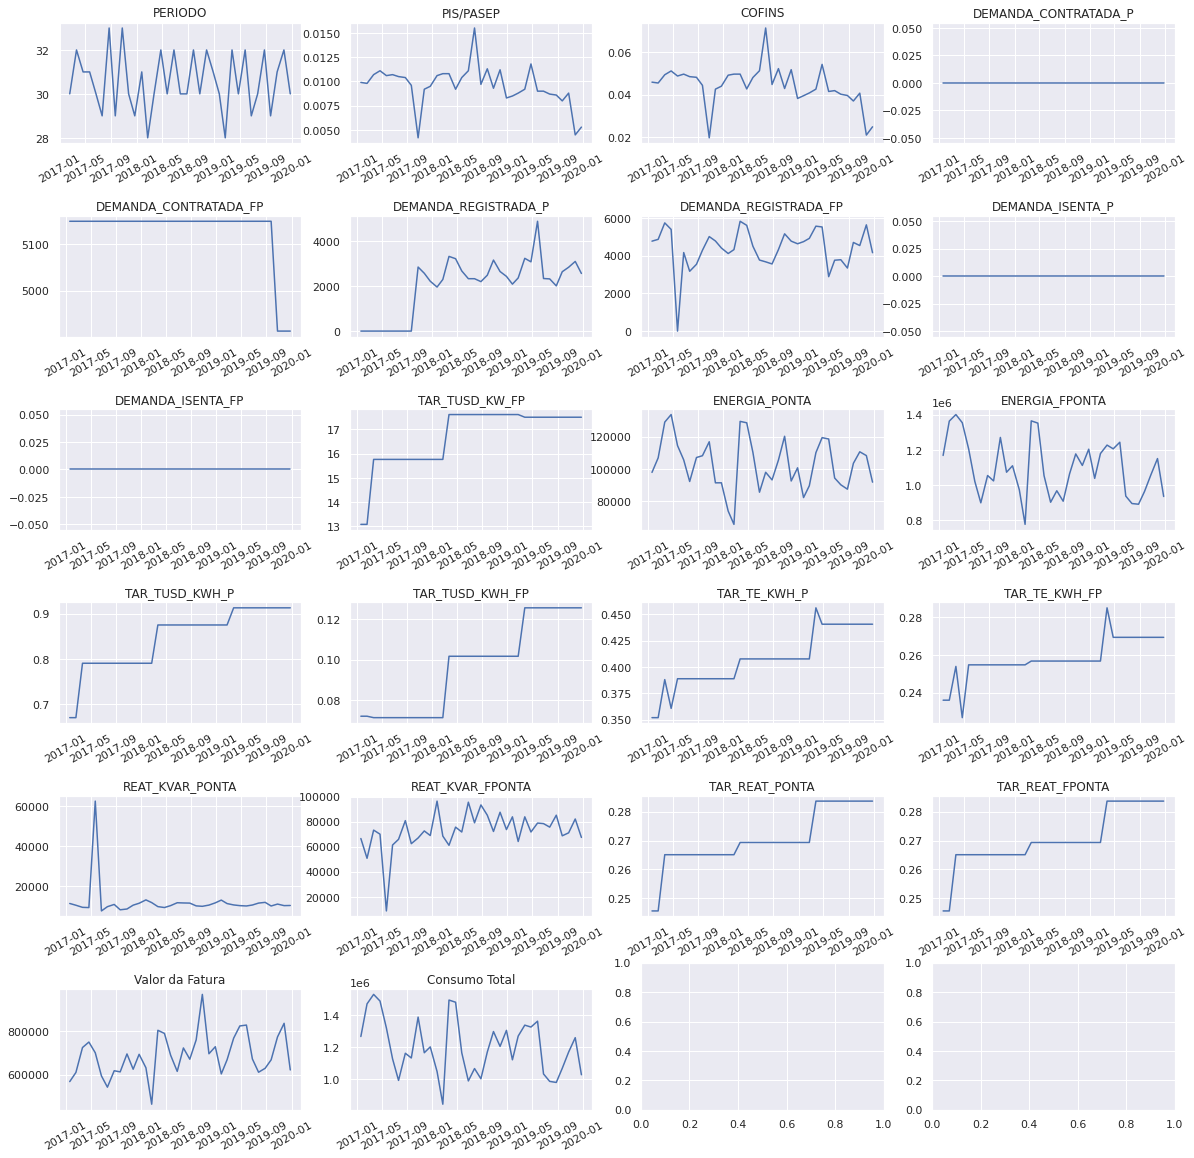

In [64]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(6, 4, i+1)
  plt.title(col)
  # UC1_df.DATA = pd.to_datetime(UC1_df.DATA)
  # UC1_df.DATA = UC1_df.DATA.dt.year
  # # = UC1_df['DATA'].apply(lambda x: x[:-3])print()
  # # UC1_df.timeStamp = pd.to_datetime(UC1_df.DATA)
  plt.plot(UC1_df.DATA, UC1_df[col])
  plt.xticks(rotation=30)  # Disable xticks.
  plt.subplots_adjust(hspace=0.6)

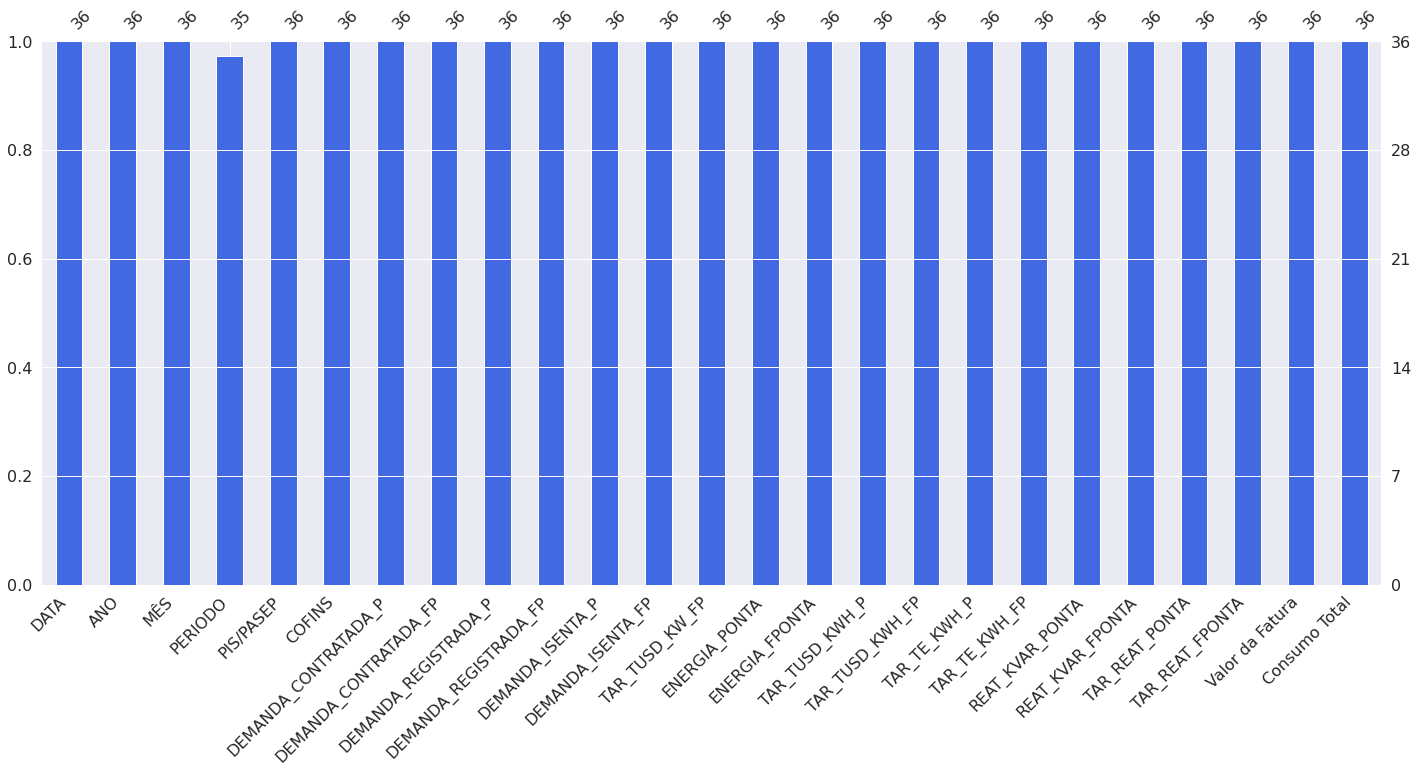

In [65]:
msno.bar(UC1_df, color="RoyalBlue")

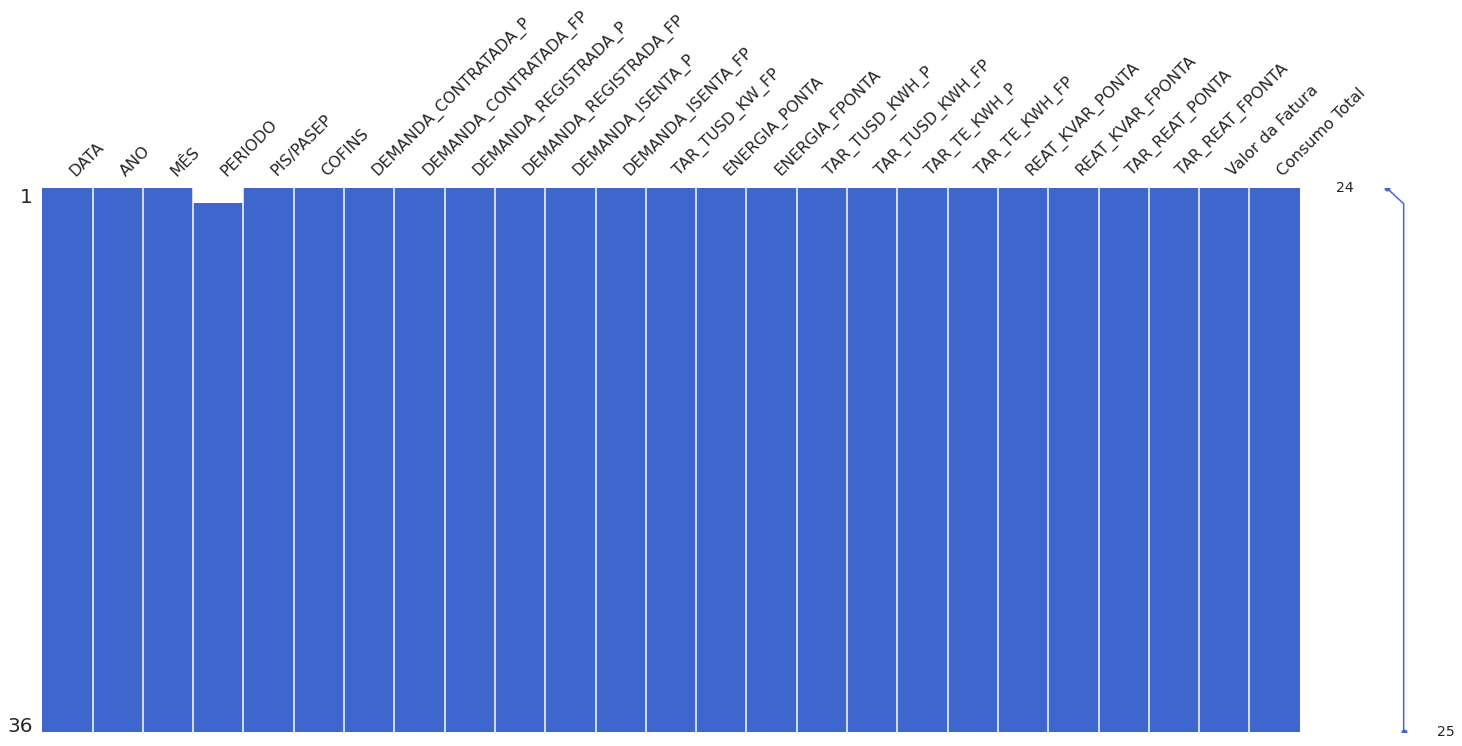

In [66]:
msno.matrix(UC1_df, color = (0.25,0.4,0.8))

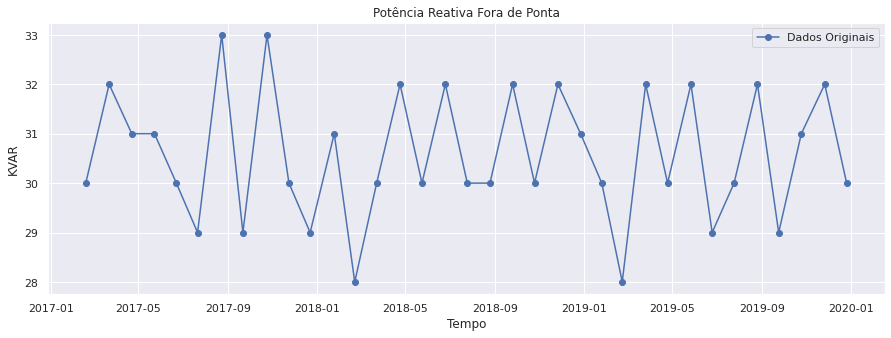

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()


## Imputações
https://en.wikipedia.org/wiki/Imputation_(statistics)#:~:text=In%20statistics%2C%20imputation%20is%20the,missing%20data%20with%20substituted%20values.&text=Because%20missing%20data%20can%20create,cases%20that%20have%20missing%20values.

### Fordward Fill Imputation ou PAD

In [67]:
UC1_ffill = UC1_df.fillna(method='ffill')

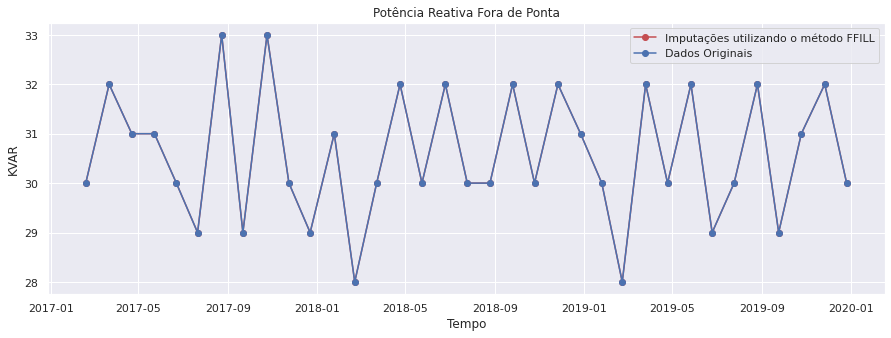

In [68]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_ffill.DATA, UC1_ffill.PERIODO, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando o método FFILL', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Backwardfill Imputation 

In [69]:
UC1_bfill = UC1_df.fillna(method='bfill')

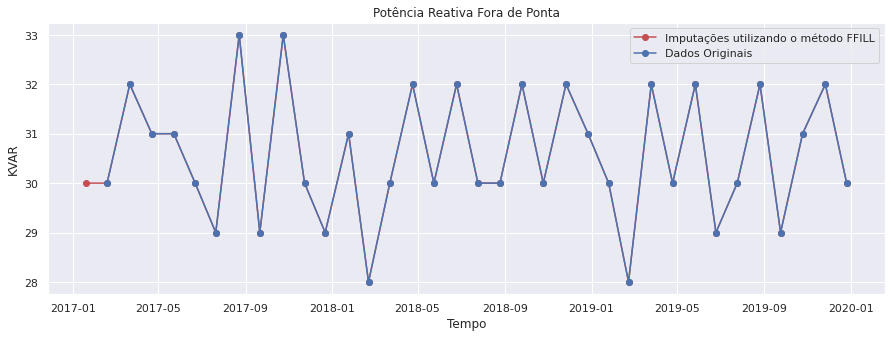

In [70]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_bfill.DATA, UC1_bfill.PERIODO, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando o método FFILL', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputção utilizando uma constante

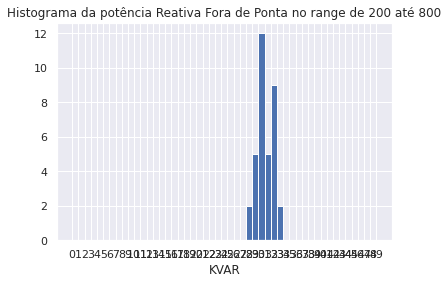

In [75]:
sns.set()
# Plot histograma 
_ = plt.hist(UC1_df.PERIODO, bins=list(range(0,50,1)), range=[0, 50])
_ = plt.xticks(list(range(0,50,1)))
_ = plt.xlabel('KVAR')
_ = plt.title("Histograma da potência Reativa Fora de Ponta no range de 200 até 800")
# Show histogram
plt.show()

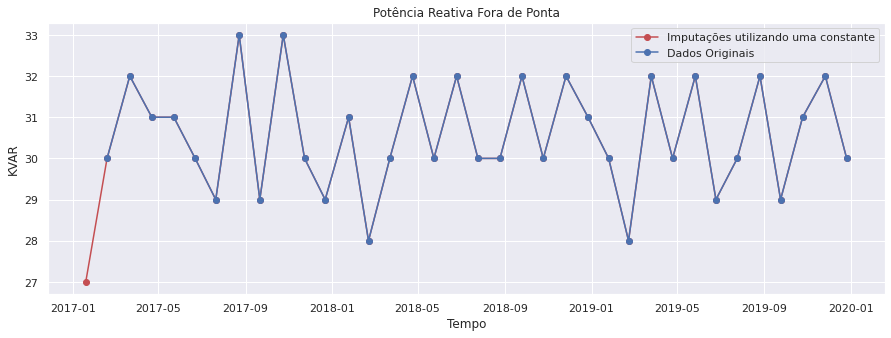

In [76]:
from sklearn.impute import SimpleImputer
UC1_constant = UC1_df.copy(deep= True)
imputer = SimpleImputer(strategy='constant', fill_value = 27)
imputer = imputer.fit(UC1_constant[["PERIODO"]])
UC1_constant['PERIODO'] = imputer.transform(UC1_constant[['PERIODO']]).ravel()
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_constant.DATA, UC1_constant.PERIODO, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando uma constante', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputação utilizando a Média

In [77]:
UC1_mean = UC1_df.copy(deep= True)
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(UC1_mean[["PERIODO"]])
UC1_mean['PERIODO'] = imputer.transform(UC1_mean[['PERIODO']]).ravel()

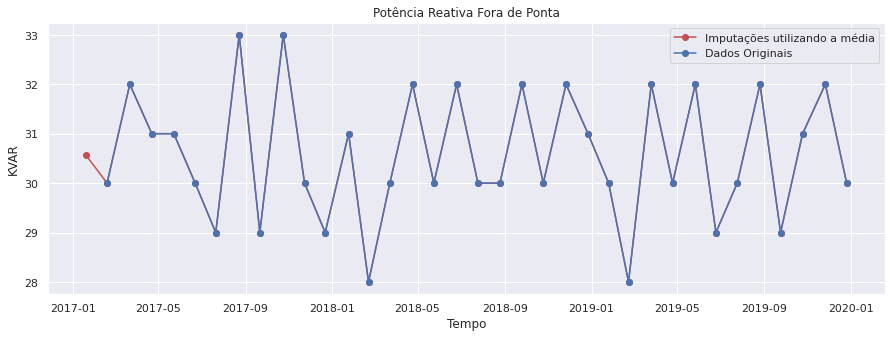

In [78]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_mean.DATA, UC1_mean.PERIODO, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a média', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputação utilizando Mediana

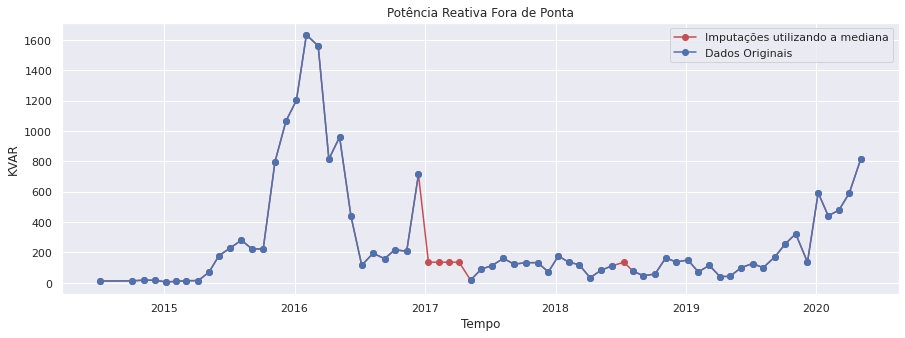

In [ ]:
UC1_median = UC1_df.copy(deep= True)
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(UC1_median[["REAT_KVAR_FPONTA"]])
UC1_median['REAT_KVAR_FPONTA'] = imputer.transform(UC1_median[['REAT_KVAR_FPONTA']]).ravel()
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_median.DATA, UC1_median.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a mediana', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputação utilizando a Moda

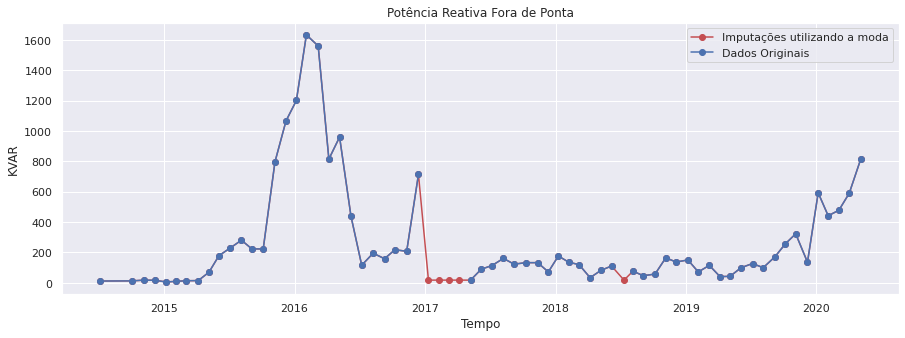

In [ ]:
UC1_mode = UC1_df.copy(deep= True)
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(UC1_mode[["REAT_KVAR_FPONTA"]])
UC1_mode['REAT_KVAR_FPONTA'] = imputer.transform(UC1_mode[['REAT_KVAR_FPONTA']]).ravel()
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_mode.DATA, UC1_mode.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a moda', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputação por interpolação Linear

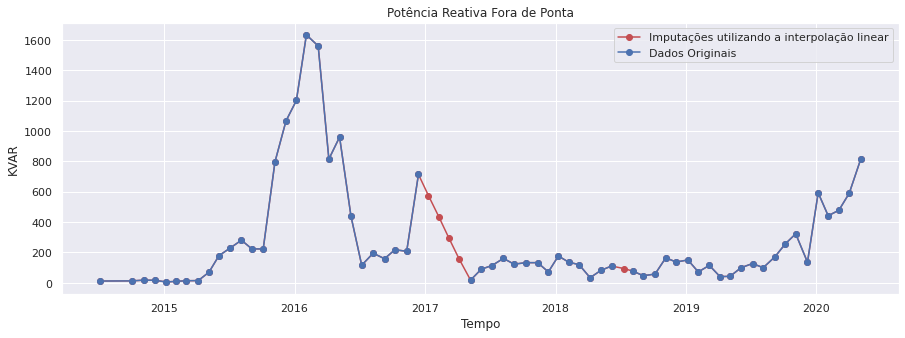

In [ ]:
UC1_linear = UC1_df.copy(deep= True)
UC1_linear['REAT_KVAR_FPONTA'].interpolate(mehod = 'linear', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_linear.DATA, UC1_linear.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a interpolação linear', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputção por interpolação quadrática

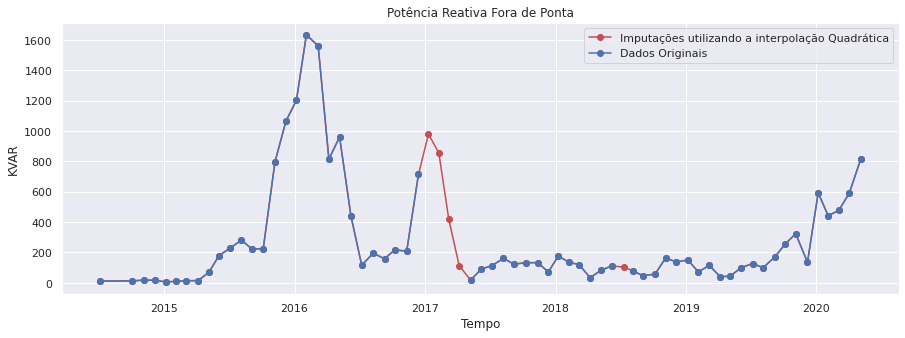

In [ ]:
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['REAT_KVAR_FPONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputação mediante utilizando o método do vizinho mais perto

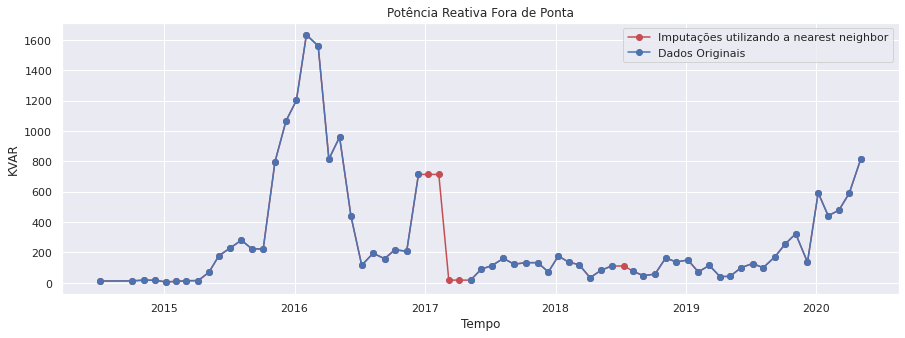

In [ ]:
UC1_nearest = UC1_df.copy(deep= True)
UC1_nearest['REAT_KVAR_FPONTA'].interpolate(method = 'nearest', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_nearest.DATA, UC1_nearest.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a nearest neighbor', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

### Imputações utilizando KNN

In [ ]:
from fancyimpute import KNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
UC1_KNN = UC1_df.copy(deep= True)
# knn_imputer = KNN()
# UC1_KNN['REAT_KVAR_FPONTA'] = knn_imputer.fit_transform(UC1_KNN[['REAT_KVAR_FPONTA']]).ravel()
# sns.set()
# fig, ax = plt.subplots(figsize=(15, 5))
# _ = plt.plot(UC1_KNN.DATA, UC1_KNN.REAT_KVAR_FPONTA, marker='o', color="r")
# _ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
# _ = plt.xlabel("Tempo")
# _ = plt.ylabel("KVAR")
# _ = plt.legend(['Imputações utilizando a k nearest neighbor', 'Dados Originais'])
# _ = plt.title("Potência Reativa Fora de Ponta")
# plt.show()

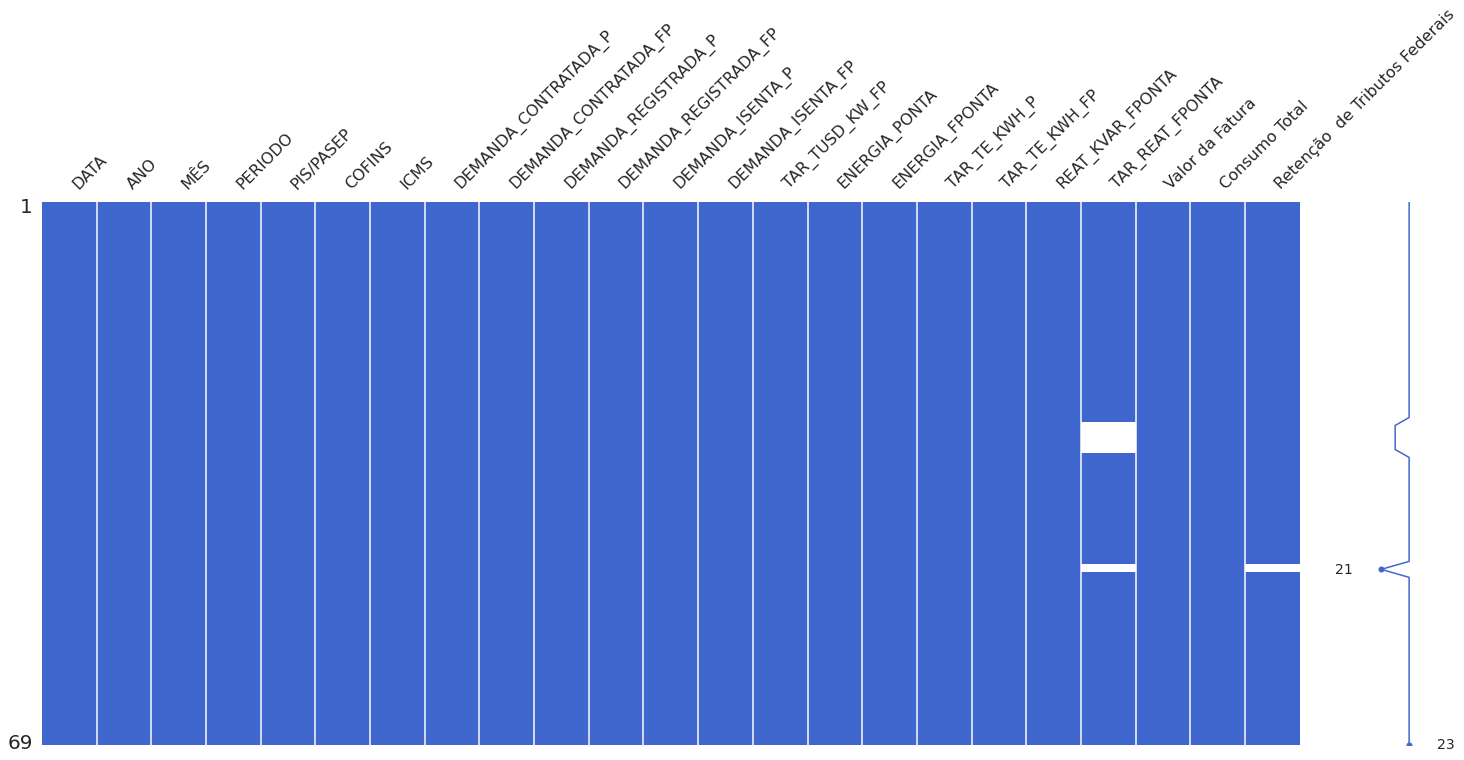

In [ ]:
msno.matrix(UC1_KNN, color = (0.25,0.4,0.8))

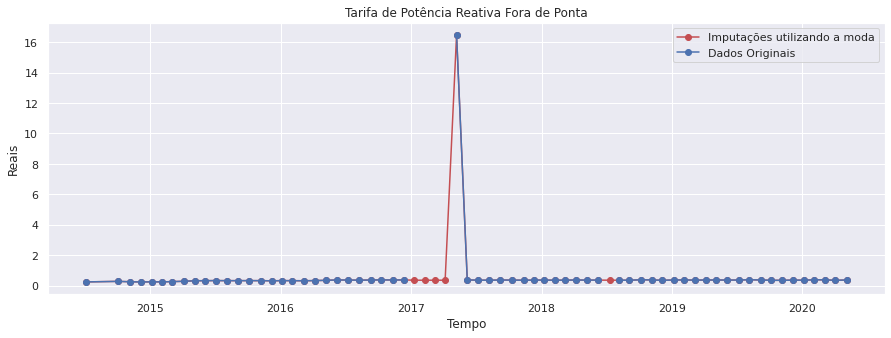

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(UC1_KNN[["TAR_REAT_FPONTA"]])
UC1_KNN['TAR_REAT_FPONTA'] = imputer.transform(UC1_KNN[['TAR_REAT_FPONTA']]).ravel()
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_KNN.DATA, UC1_KNN.TAR_REAT_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_REAT_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a moda', 'Dados Originais'])
_ = plt.title("Tarifa de Potência Reativa Fora de Ponta")
plt.show()

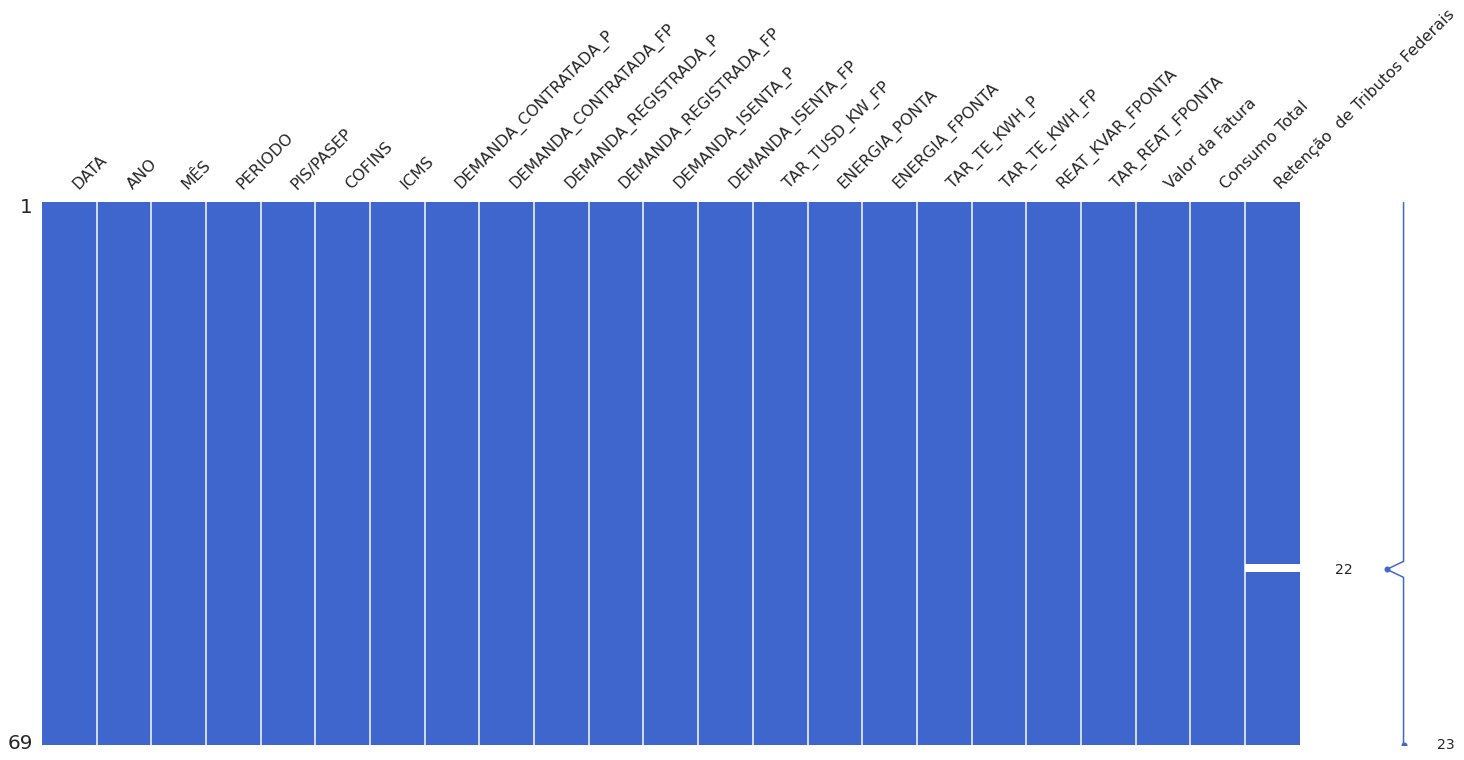

In [ ]:
msno.matrix(UC1_KNN, color = (0.25,0.4,0.8))

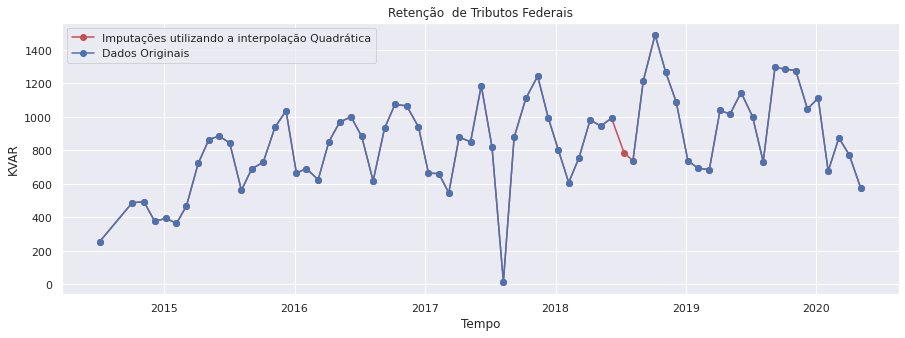

In [ ]:
UC1_KNN['Retenção  de Tributos Federais'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_KNN.DATA, UC1_KNN['Retenção  de Tributos Federais'], marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df['Retenção  de Tributos Federais'], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Retenção  de Tributos Federais")
plt.show()

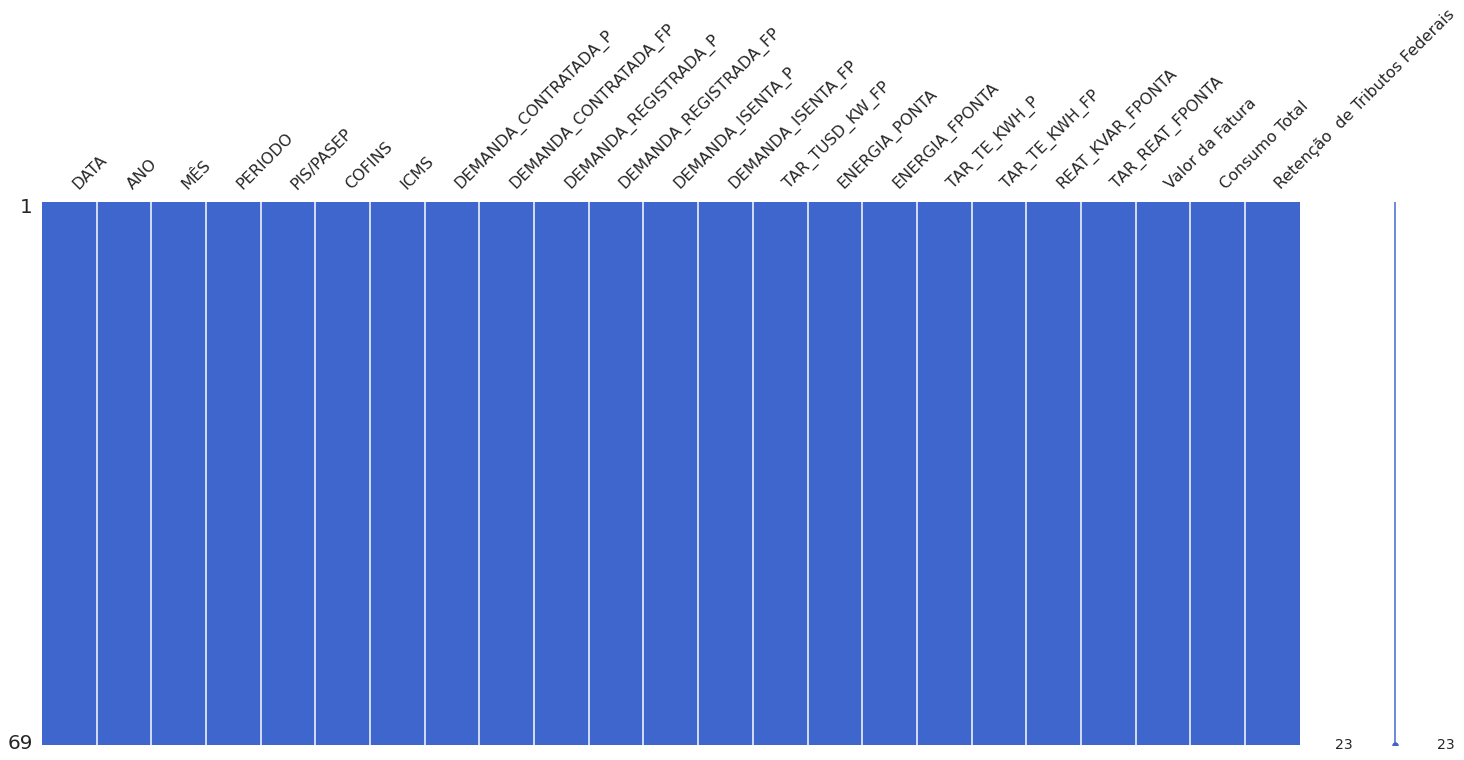

In [ ]:
msno.matrix(UC1_KNN, color = (0.25,0.4,0.8))

ValueError: ignored

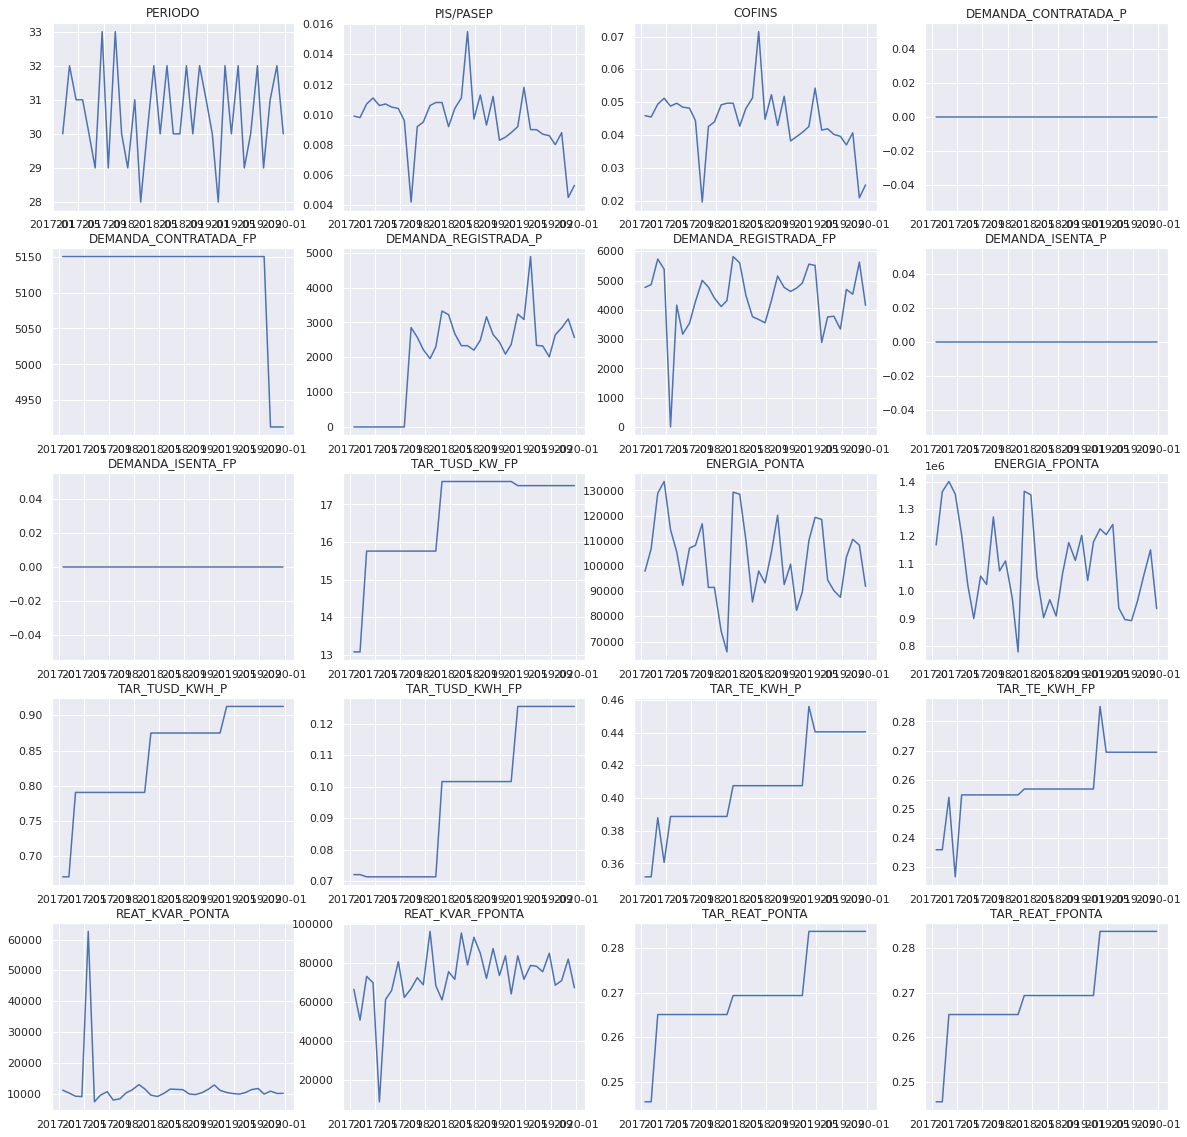

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])


## Outliers
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

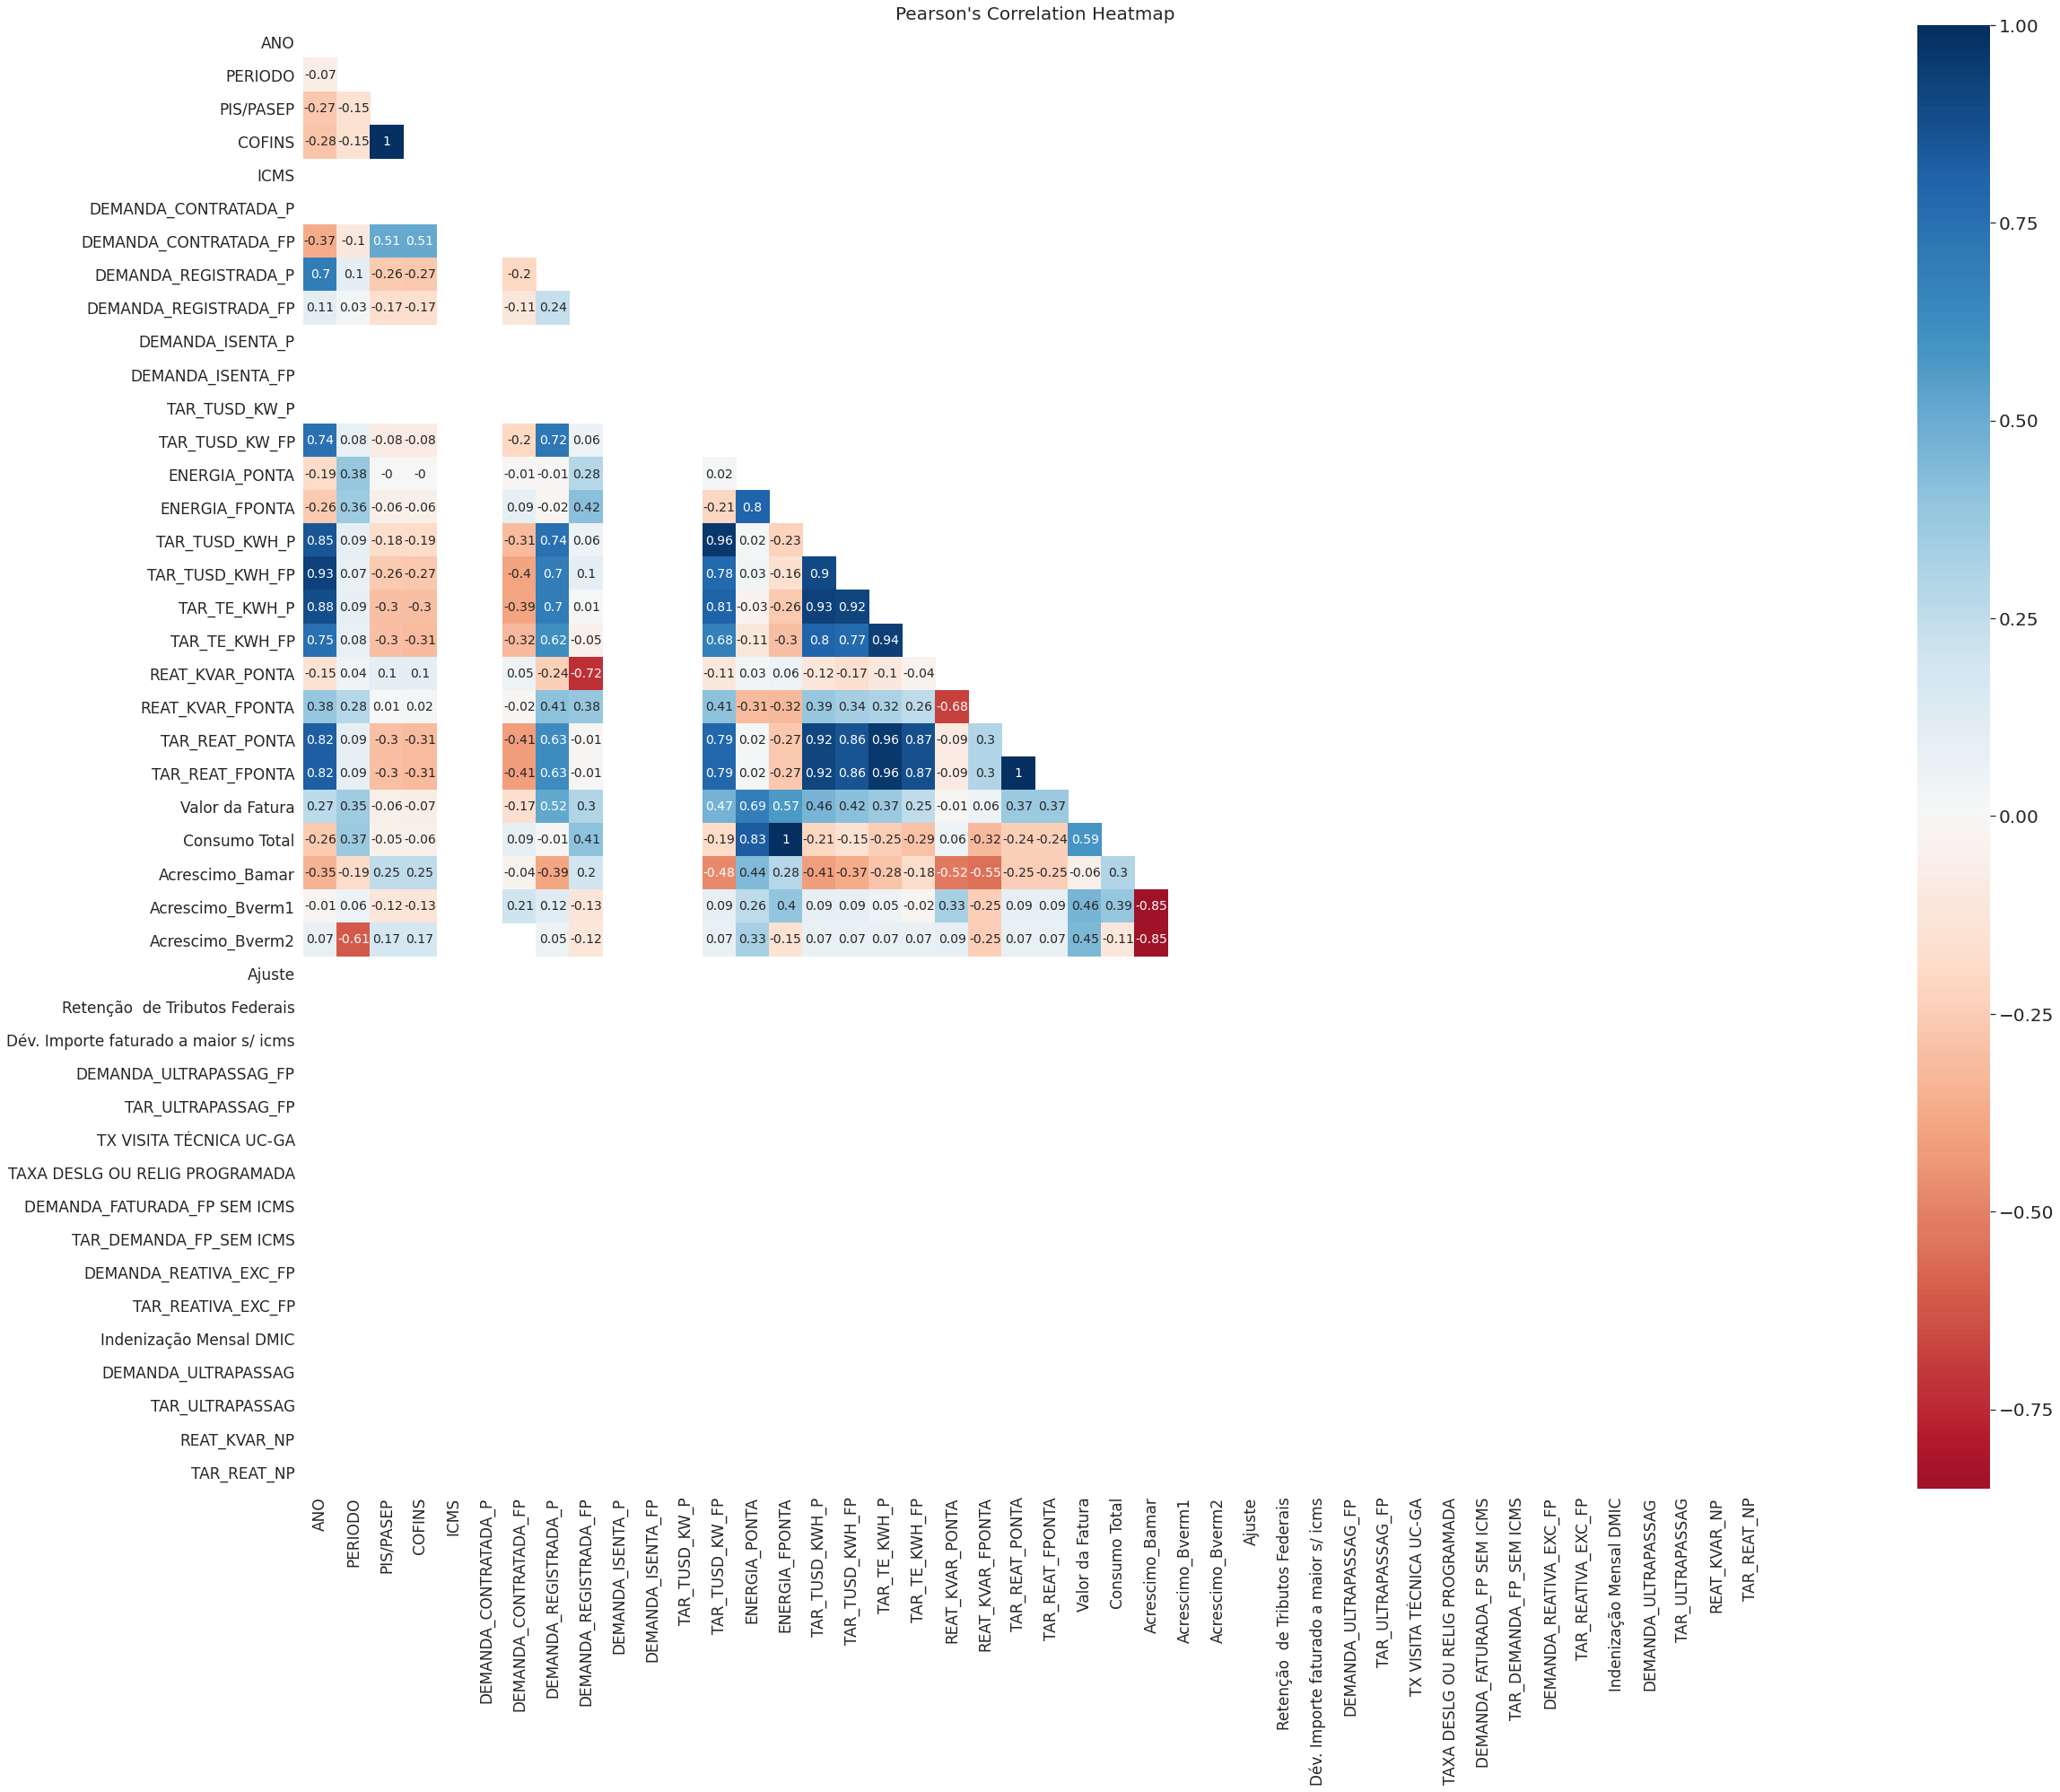

In [ ]:
cor = UC1_KNN
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(60, 30))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

In [ ]:
corr = UC1_KNN.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


### Método Z score
https://en.wikipedia.org/wiki/Standard_score#/media/File:The_Normal_Distribution.svg

In [ ]:
def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

In [ ]:
outliers = z_score(UC1_KNN[["REAT_KVAR_FPONTA"]].values, 2)
outliers

[array([1067.]), array([1201.]), array([1633.]), array([1560.])]

In [ ]:
print(len(outliers)/len(UC1_KNN[["REAT_KVAR_FPONTA"]].values)*100, "%")

5.797101449275362 %


In [ ]:
outliers = z_score(UC1_df[["REAT_KVAR_FPONTA"]].values, 2)
outliers

[]

In [ ]:
outliers = z_score(UC1_KNN[["DEMANDA_CONTRATADA_FP"]].values)
outliers

[array([160])]

In [ ]:
index_value = UC1_KNN[["DEMANDA_CONTRATADA_FP"]][UC1_KNN[["DEMANDA_CONTRATADA_FP"]].eq(160).any(1)].index.tolist()[0]
UC1_KNN.at[index_value, 'DEMANDA_CONTRATADA_FP'] = UC1_KNN.DEMANDA_CONTRATADA_FP.mode()

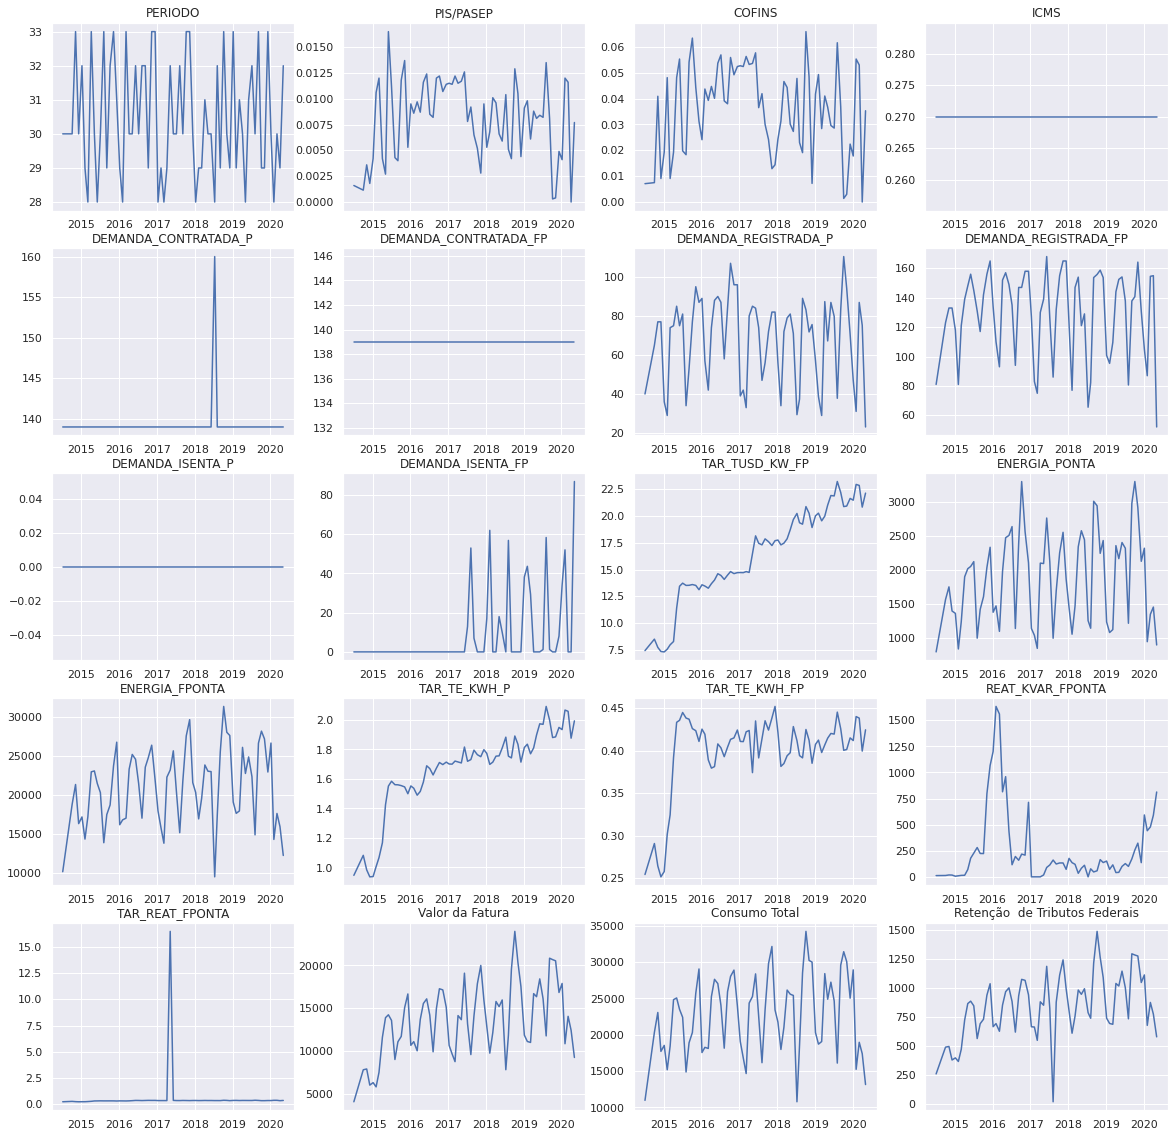

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

### Interquartile range

In [ ]:
def outlier_IQR(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
lowerbound , upperbound = outlier_IQR(UC1_KNN["TAR_REAT_FPONTA"])

In [ ]:
UC1_KNN["TAR_REAT_FPONTA"][(UC1_KNN["TAR_REAT_FPONTA"] < lowerbound) | (UC1_KNN["TAR_REAT_FPONTA"] > upperbound)]

0      0.24735
2      0.25708
3      0.24469
4      0.25097
5      0.25147
6      0.26647
32    16.48000
Name: TAR_REAT_FPONTA, dtype: float64

In [ ]:
index_value = 32
UC1_KNN.at[index_value, 'TAR_REAT_FPONTA'] = UC1_KNN.TAR_REAT_FPONTA.mode()

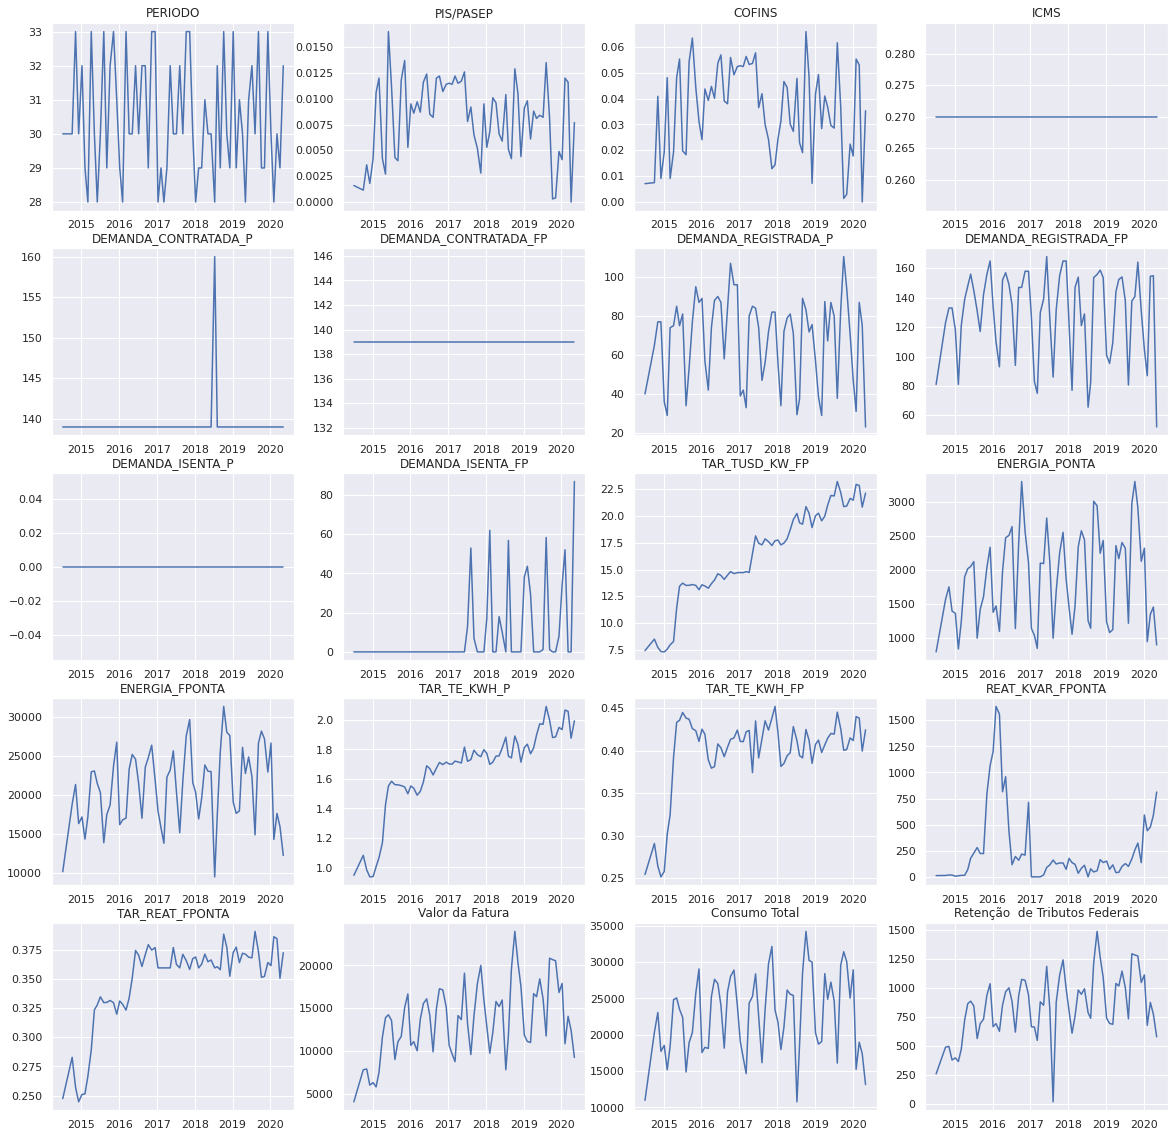

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

## Box Diagram

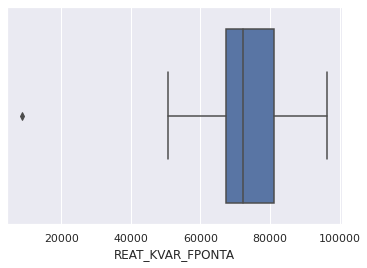

In [ ]:
sns.boxplot(x=UC1_KNN.REAT_KVAR_FPONTA)

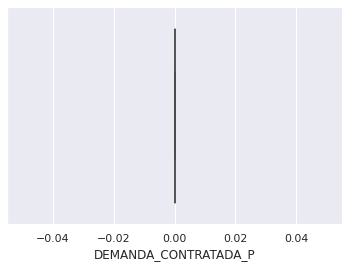

In [ ]:
sns.boxplot(x=UC1_KNN.DEMANDA_CONTRATADA_P)

In [ ]:
index_value = UC1_KNN[["DEMANDA_CONTRATADA_P"]][UC1_KNN[["DEMANDA_CONTRATADA_P"]].eq(160).any(1)].index.tolist()[0]
UC1_KNN.at[index_value, 'DEMANDA_CONTRATADA_P'] = UC1_KNN.DEMANDA_CONTRATADA_P.mode()

IndexError: ignored

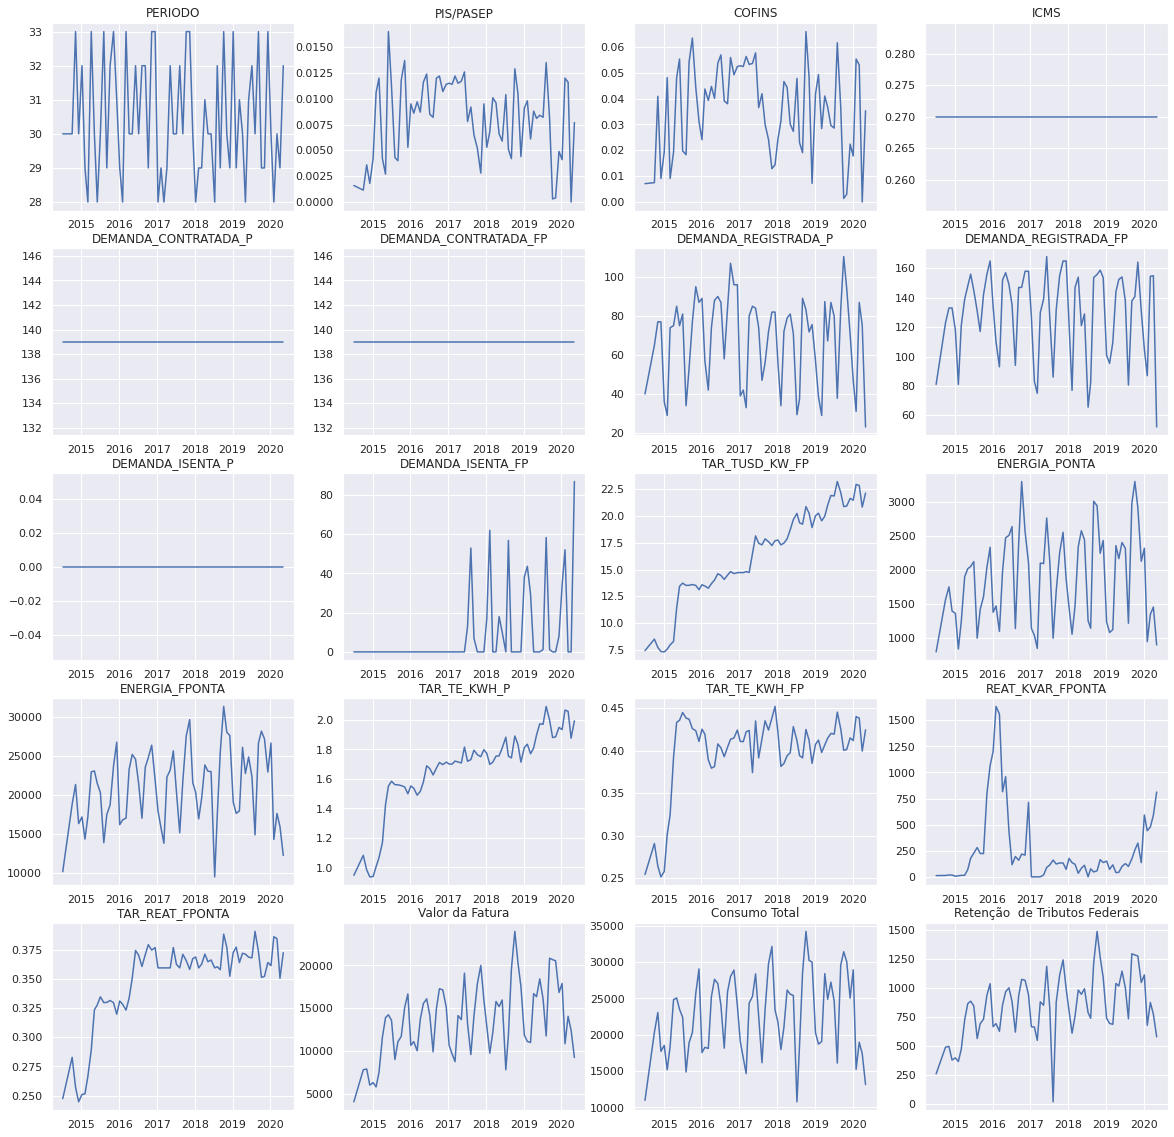

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

## Matriz de Correlação de Dados sem outlier

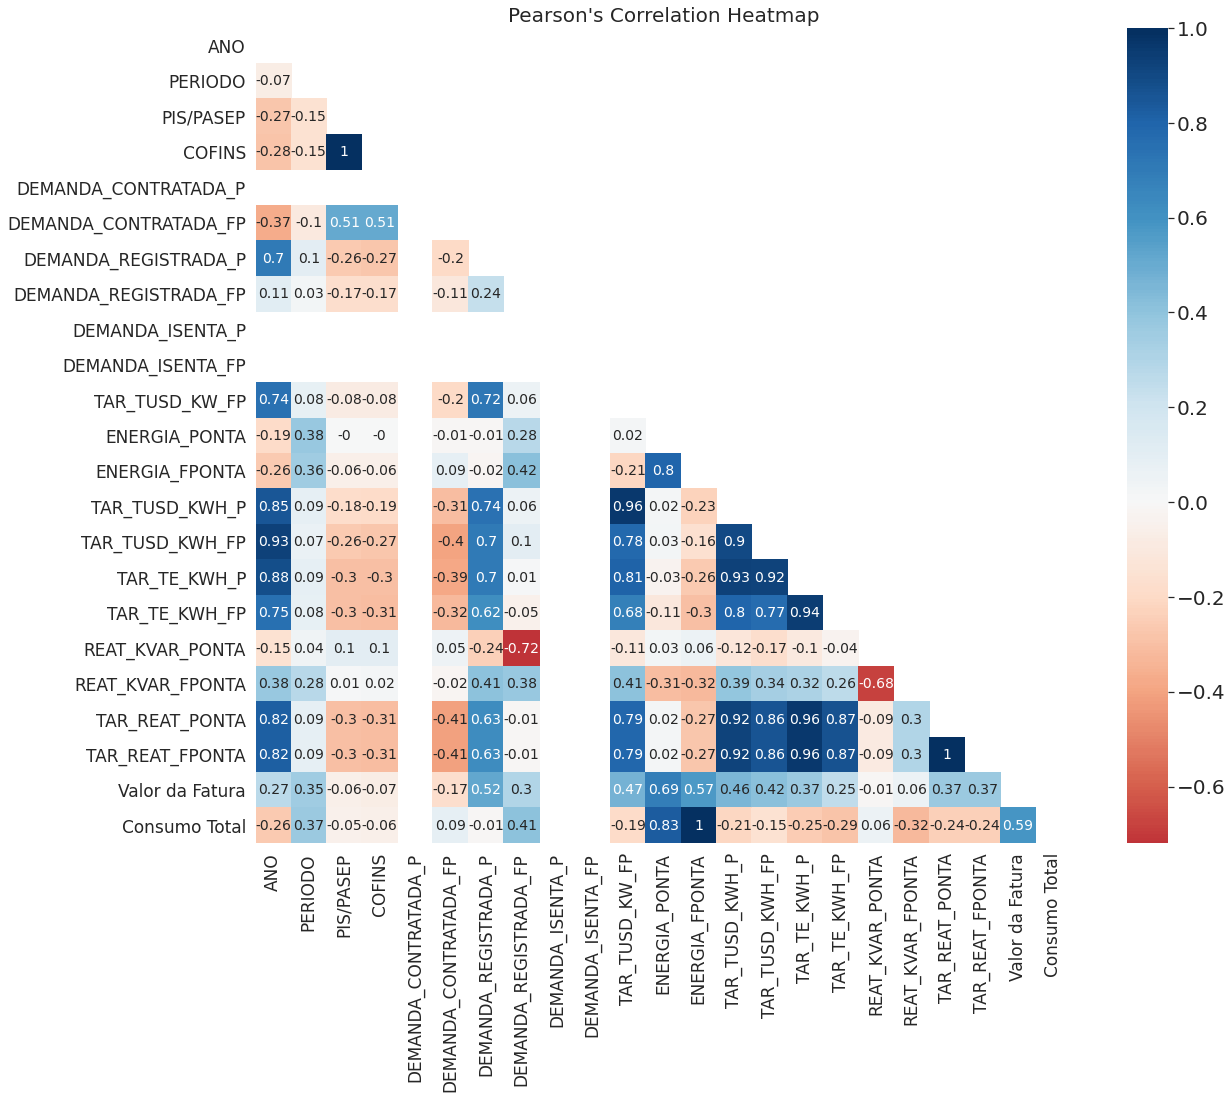

In [ ]:
cor = UC1_KNN
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

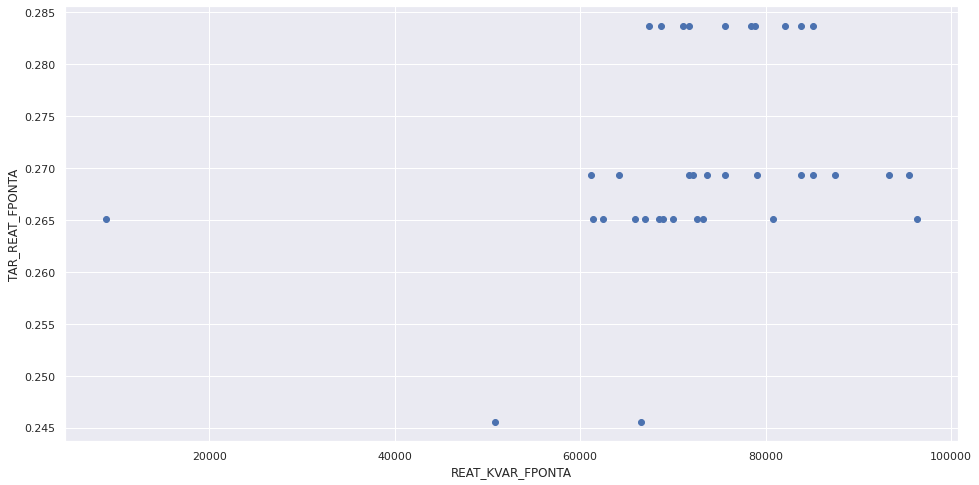

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC1_KNN["REAT_KVAR_FPONTA"], UC1_KNN["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

## Diagrama de Disperção de Variaveis Correlacionadas

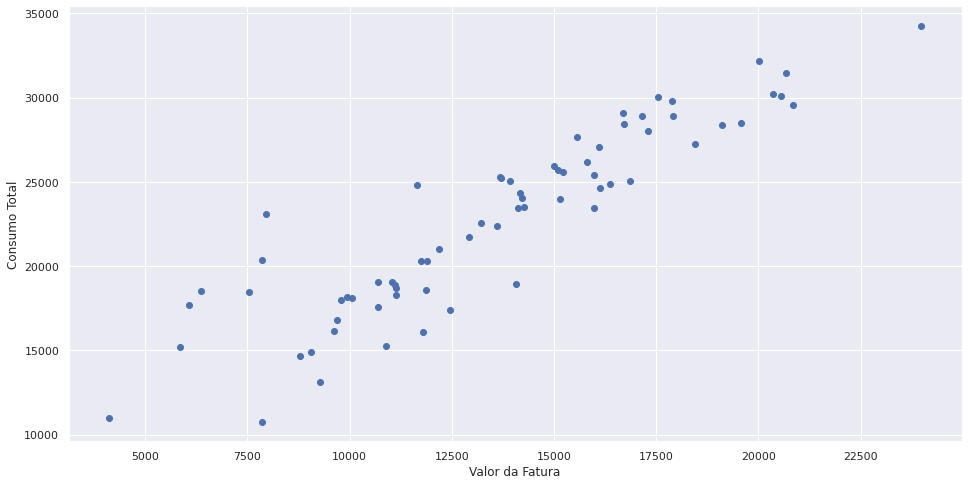

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC1_KNN["Valor da Fatura"], UC1_KNN["Consumo Total"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

# Modeling

In [ ]:
df_train = UC1_KNN["REAT_KVAR_FPONTA"].iloc[:28]
df_test = UC1_KNN["REAT_KVAR_FPONTA"].iloc[28:]

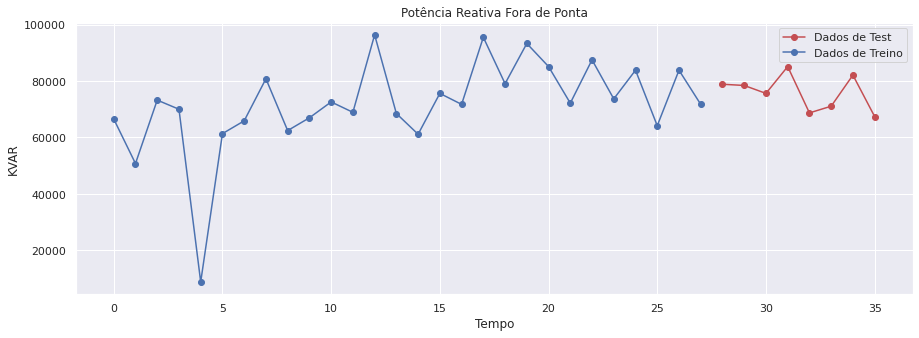

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 2.1MB 13.1MB/s 
     |████████████████████████████████| 9.5MB 41.9MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/Cython-0.29.17.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/pmdarima-1.8.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/statsmodels-0.12.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/36 with 0 missing, elapsed time: 0.001


ValueError: ignored

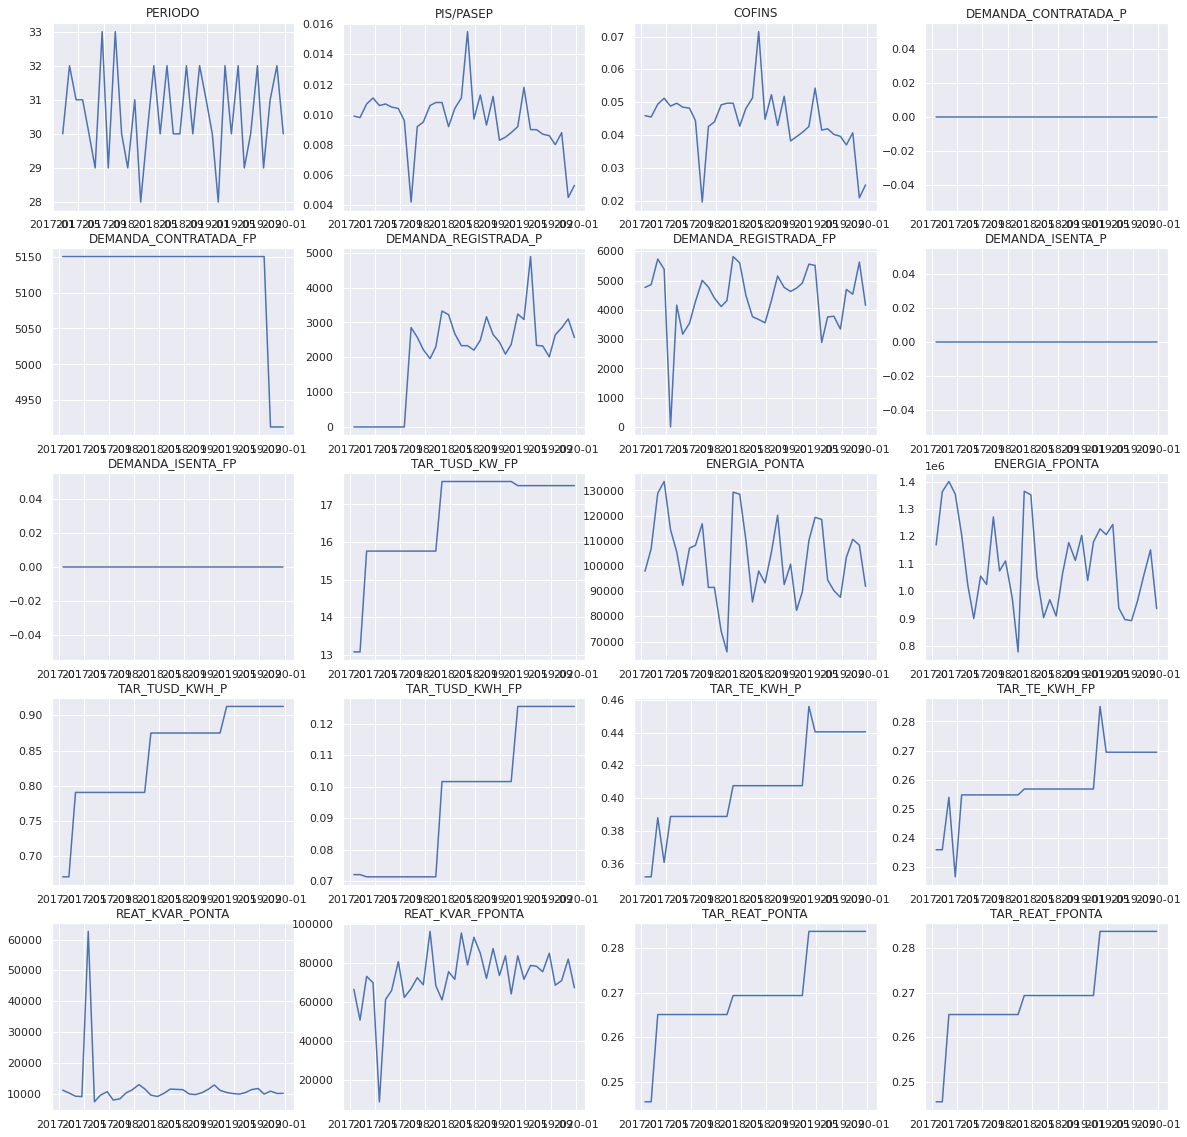

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
import pandas as pd
from fancyimpute import KNN
from sklearn.impute import SimpleImputer

sns.set()
abas_de_excel =  pd.ExcelFile("/content/IT304-Grupo5/Contas de energia UFRJ.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_KNN = UC1_df.copy(deep= True)
df_train = UC1_KNN["REAT_KVAR_FPONTA"].iloc[:28]
df_test = UC1_KNN["REAT_KVAR_FPONTA"].iloc[28:]

def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

# index_value = UC1_KNN[["DEMANDA_CONTRATADA_FP"]][UC1_KNN[["DEMANDA_CONTRATADA_FP"]].eq(160).any(1)].index.tolist()[0]
# UC1_KNN.at[index_value, 'DEMANDA_CONTRATADA_FP'] = UC1_KNN.DEMANDA_CONTRATADA_FP.mode()
# index_value = 32
# UC1_KNN.at[index_value, 'TAR_REAT_FPONTA'] = UC1_KNN.TAR_REAT_FPONTA.mode()
# index_value = UC1_KNN[["DEMANDA_CONTRATADA_P"]][UC1_KNN[["DEMANDA_CONTRATADA_P"]].eq(160).any(1)].index.tolist()[0]
# UC1_KNN.at[index_value, 'DEMANDA_CONTRATADA_P'] = UC1_KNN.DEMANDA_CONTRATADA_P.mode()

f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

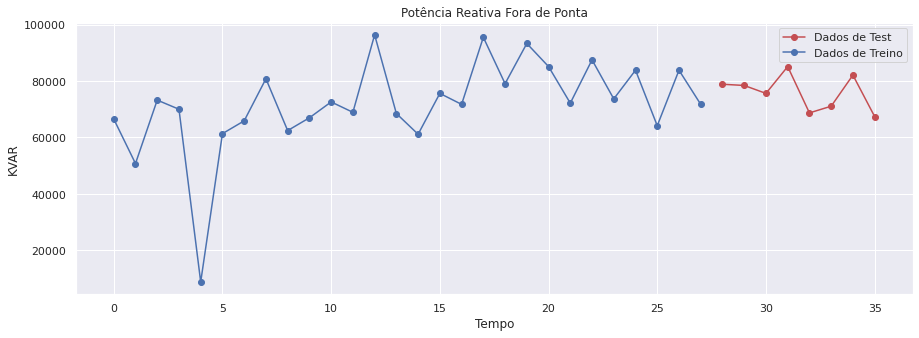

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

In [ ]:
from pmdarima.arima import ADFTest

In [ ]:
adf_test = ADFTest(alpha=0.05)

In [ ]:
adf_test.should_diff(df_train)

(0.3437526200165884, True)

In [ ]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=347.127, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=343.616, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=336.915, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=348.269, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=337.508, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=337.362, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=337.782, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=339.357, Time=0.37 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=340.758, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=340.660, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=337.708, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=343.592, Time=0.05 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=338.604, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=338.610, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   28
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -165.458
Date:                            Tue, 12 Jan 2021   AIC                            336.915
Time:                                    12:28:11   BIC                            339.039
Sample:                                         0   HQIC                           336.893
                                             - 28                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6072      0.316      1.924      0.054      -0.011       1.226
ma.S.L12      -0.7803      0.790     -0.987      0.323      -2.329       0.769
sigma2      2.484e+08   1.71e-09   1.45e+17      0.000    2.48e+08    2.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.34   Prob(JB):                         0.54
Heteroskedasticity (H):               1.06   Skew:                             0.38
Prob(H) (two-sided):                  0.95   Kurtosis:                         1.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+34. Standard errors may be unstable.
"""

In [ ]:
# predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12))

predicoes.columns = ['predicoes']

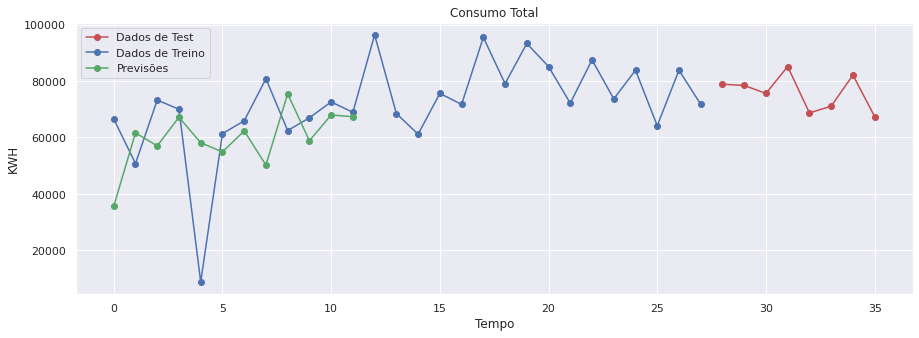

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [ ]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [ ]:
np.mean(RMSE(df_test.values, predicoes.values))

19185.318623712676

# Experimento KNN para previsão de 12 meses REAT_KVAR_FPONTA

In [ ]:
Melhor_RMSE = dict.fromkeys(["RMSE_KNN","RMSE_FFILL", "RMSE_Quadratica"])

In [ ]:
knn_imputer = KNN()
UC1_KNN['REAT_KVAR_FPONTA'] = knn_imputer.fit_transform(UC1_KNN[['REAT_KVAR_FPONTA']]).ravel()
df_train = UC1_KNN["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_KNN["REAT_KVAR_FPONTA"].iloc[57:]

arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_KNN = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_KNN": RMSE_KNN})
print("RMSE_KNN:",RMSE_KNN)

/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/36 with 0 missing, elapsed time: 0.003
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=523.947, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.273, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=525.008, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=518.496, Time=0.17 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=520.495, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=520.495, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=520.190, Time=0.11 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=522.495, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=517.016, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=520.779, Time=0.04 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=519.016, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=518.452, Time=0.22 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=518.36

ValueError: ignored

# Experimento FFILL para previsão de 12 meses REAT_KVAR_FPONTA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=638.965, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=627.509, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=639.740, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=620.226, Time=0.47 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=618.226, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=625.509, Time=0.10 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=604.476, Time=1.42 sec

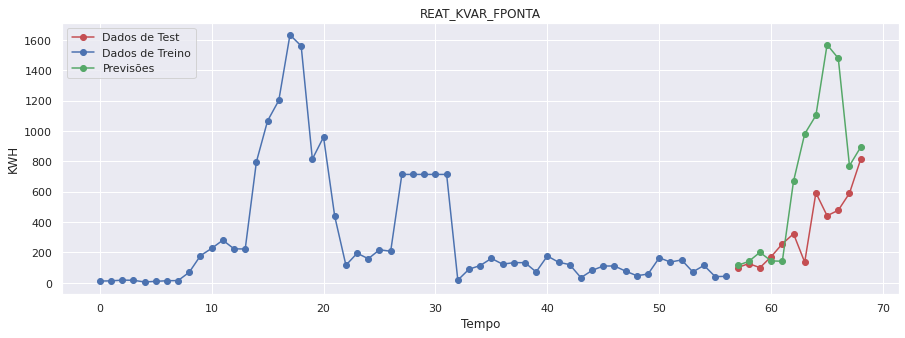

RMSE_FFILL: 648.1958312611249


In [ ]:
abas_de_excel =  pd.ExcelFile("/content/IT304S/UFCA.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_ffill = UC1_df.fillna(method='ffill')
df_train = UC1_ffill["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_ffill["REAT_KVAR_FPONTA"].iloc[57:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_FFILL = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_FFILL": RMSE_FFILL})
print("RMSE_FFILL:",RMSE_FFILL)


# Experimento Imputação por Interpolação Quadrática para previsão de 12 meses REAT_KVAR_FPONTA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=628.489, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=619.828, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=630.080, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=614.165, Time=0.47 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=613.258, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=619.779, Time=0.10 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=598.011, Time=1.36 sec

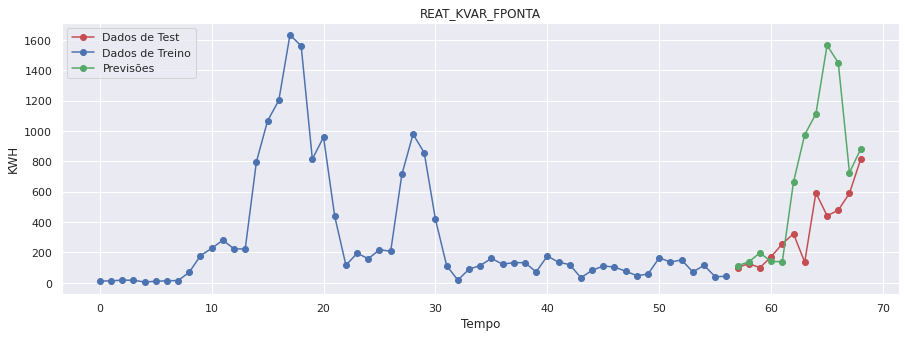

RMSE_Quadratica 641.1655849076566


In [ ]:
abas_de_excel =  pd.ExcelFile("/content/IT304S/UFCA.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['REAT_KVAR_FPONTA'].interpolate(method = 'quadratic', inplace = True)
df_train = UC1_quadratica["REAT_KVAR_FPONTA"].iloc[:57]
df_test = UC1_quadratica["REAT_KVAR_FPONTA"].iloc[57:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("REAT_KVAR_FPONTA")
plt.show()

RMSE_Quadratica = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_Quadratica": RMSE_Quadratica})
print("RMSE_Quadratica", RMSE_Quadratica)

In [ ]:
min(Melhor_RMSE, key=Melhor_RMSE.get)

'RMSE_KNN'

# Comparação de PMF

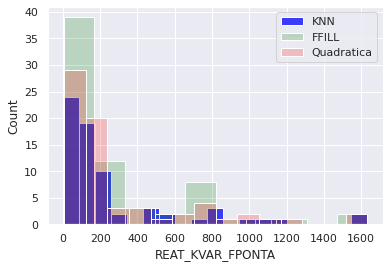

In [ ]:
sns.histplot(UC1_KNN["REAT_KVAR_FPONTA"],color="blue")
sns.histplot(UC1_ffill["REAT_KVAR_FPONTA"],color="green", alpha=0.2)
sns.histplot(UC1_quadratica["REAT_KVAR_FPONTA"],color="red", alpha=0.2)
plt.legend(['KNN', 'FFILL', 'Quadratica'])

# Resultado Banco de dados com imputações KNN

In [ ]:
UC1_KNN.describe()

ANO    PERIODO  ...  Consumo Total  Retenção  de Tributos Federais
count    69.000000  69.000000  ...      69.000000                       69.000000
mean   2017.043478  30.449275  ...   22718.449275                      839.493604
std       1.718710   1.702388  ...    5422.548610                      273.220432
min    2014.000000  28.000000  ...   10776.000000                       15.040000
25%    2016.000000  29.000000  ...   18442.000000                      676.180000
50%    2017.000000  30.000000  ...   23455.000000                      852.000000
75%    2018.000000  32.000000  ...   27050.000000                     1016.850000
max    2020.000000  33.000000  ...   34239.000000                     1489.550000

[8 rows x 21 columns]

In [ ]:
UC1_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATA                            69 non-null     datetime64[ns]
 1   ANO                             69 non-null     int64         
 2   MÊS                             69 non-null     object        
 3   PERIODO                         69 non-null     int64         
 4   PIS/PASEP                       69 non-null     float64       
 5   COFINS                          69 non-null     float64       
 6   ICMS                            69 non-null     float64       
 7   DEMANDA_CONTRATADA_P            69 non-null     int64         
 8   DEMANDA_CONTRATADA_FP           69 non-null     int64         
 9   DEMANDA_REGISTRADA_P            69 non-null     float64       
 10  DEMANDA_REGISTRADA_FP           69 non-null     float64       
 11  DEMANDA_

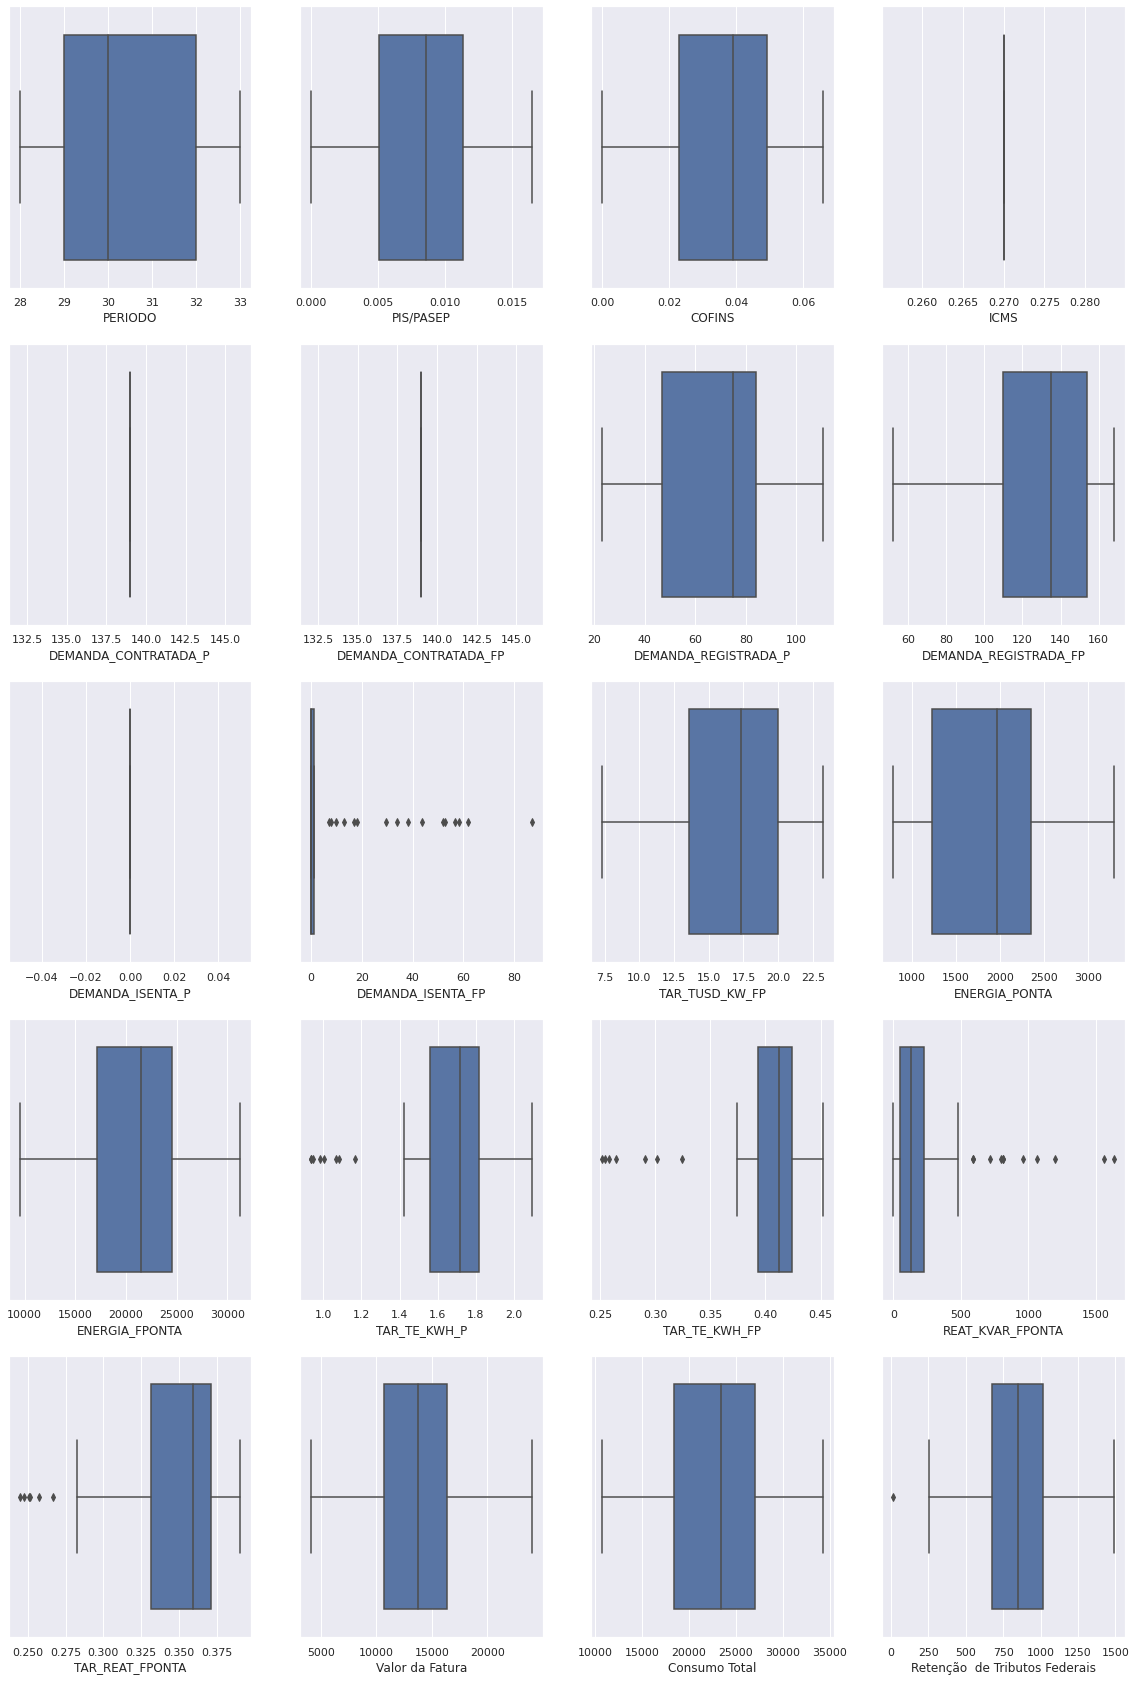

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,30))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  sns.boxplot(x=UC1_KNN[col])

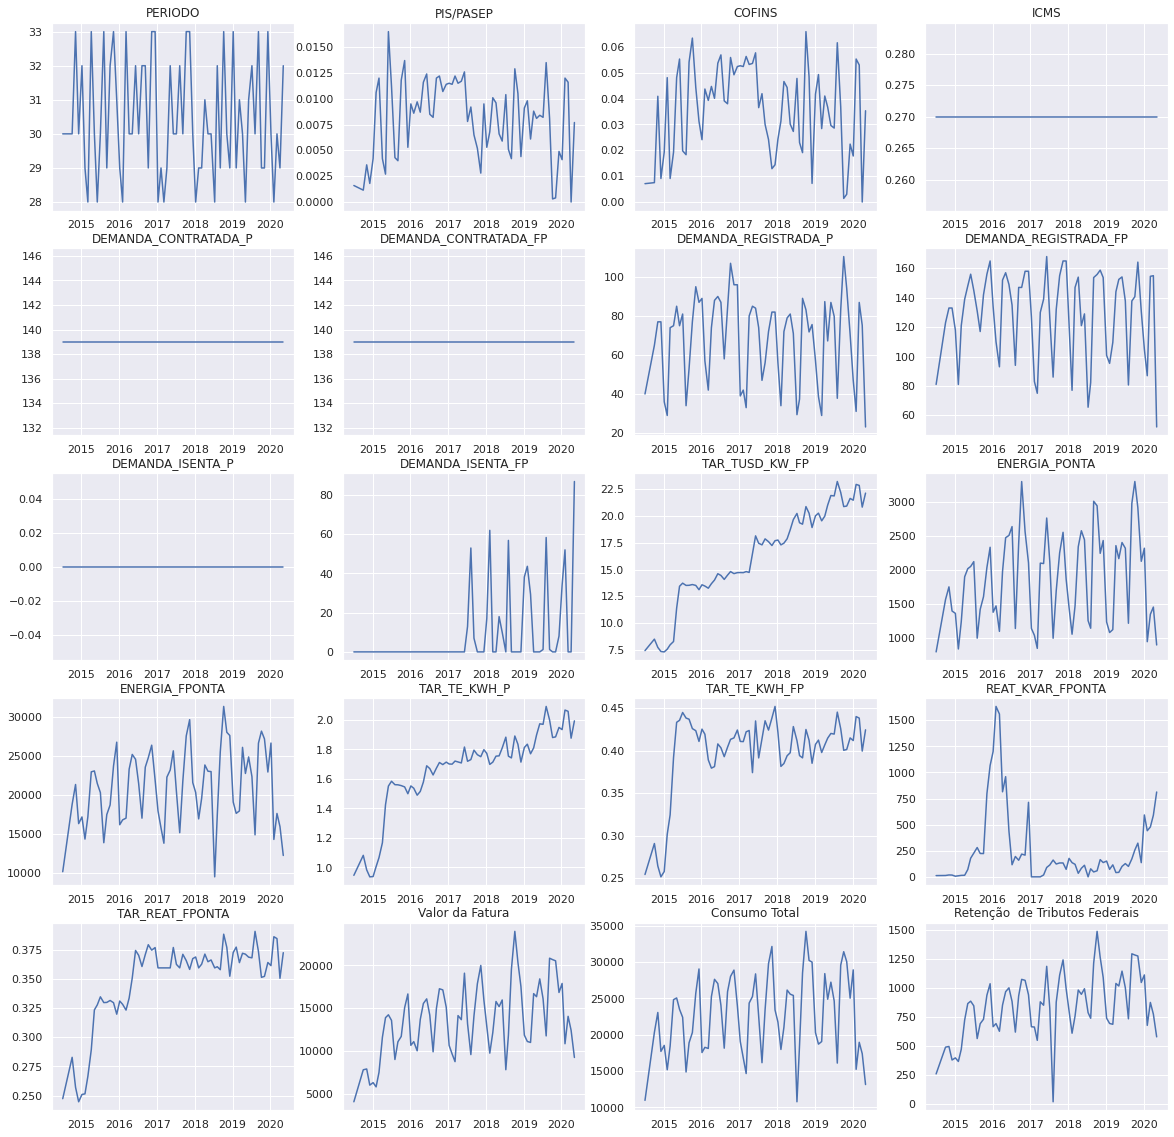

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_KNN.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_KNN.DATA, UC1_KNN[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


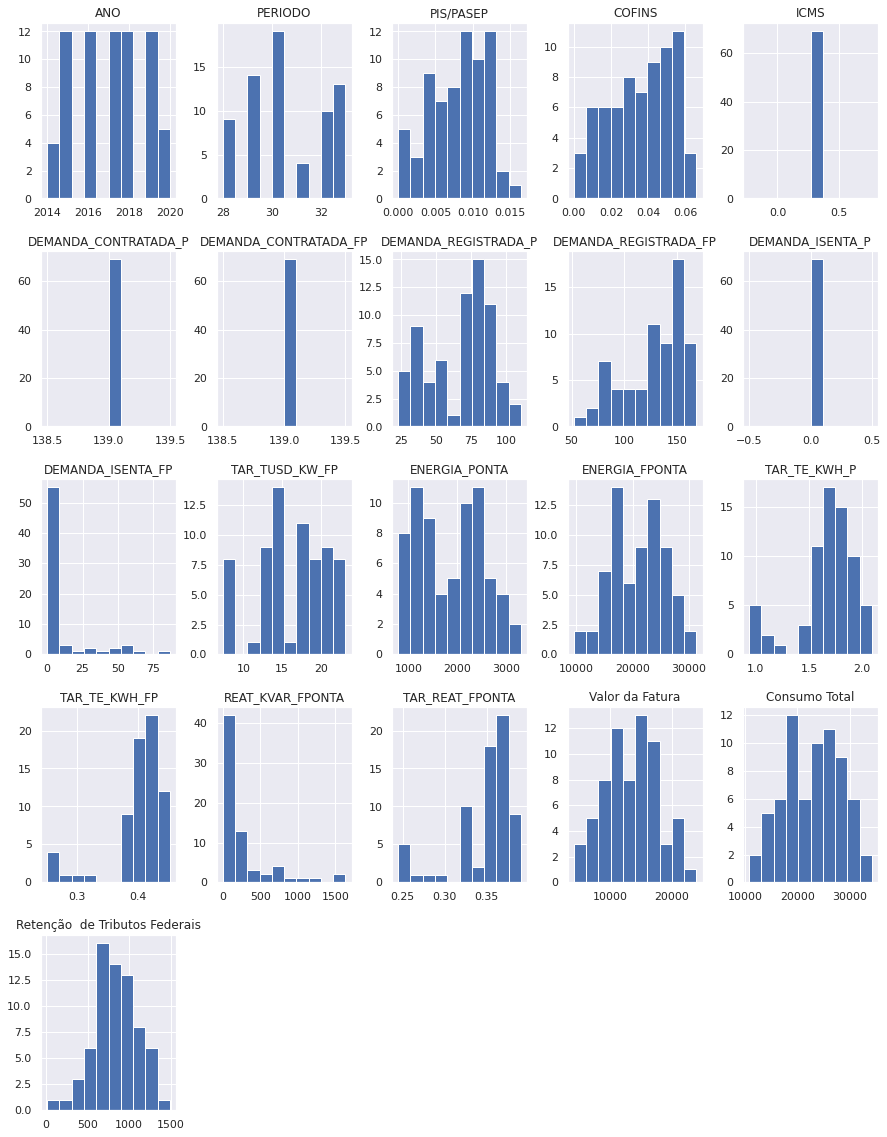

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC1_KNN.hist(ax = ax);

In [ ]:
UC1_KNN.to_csv(r'UC1.csv', index = False)

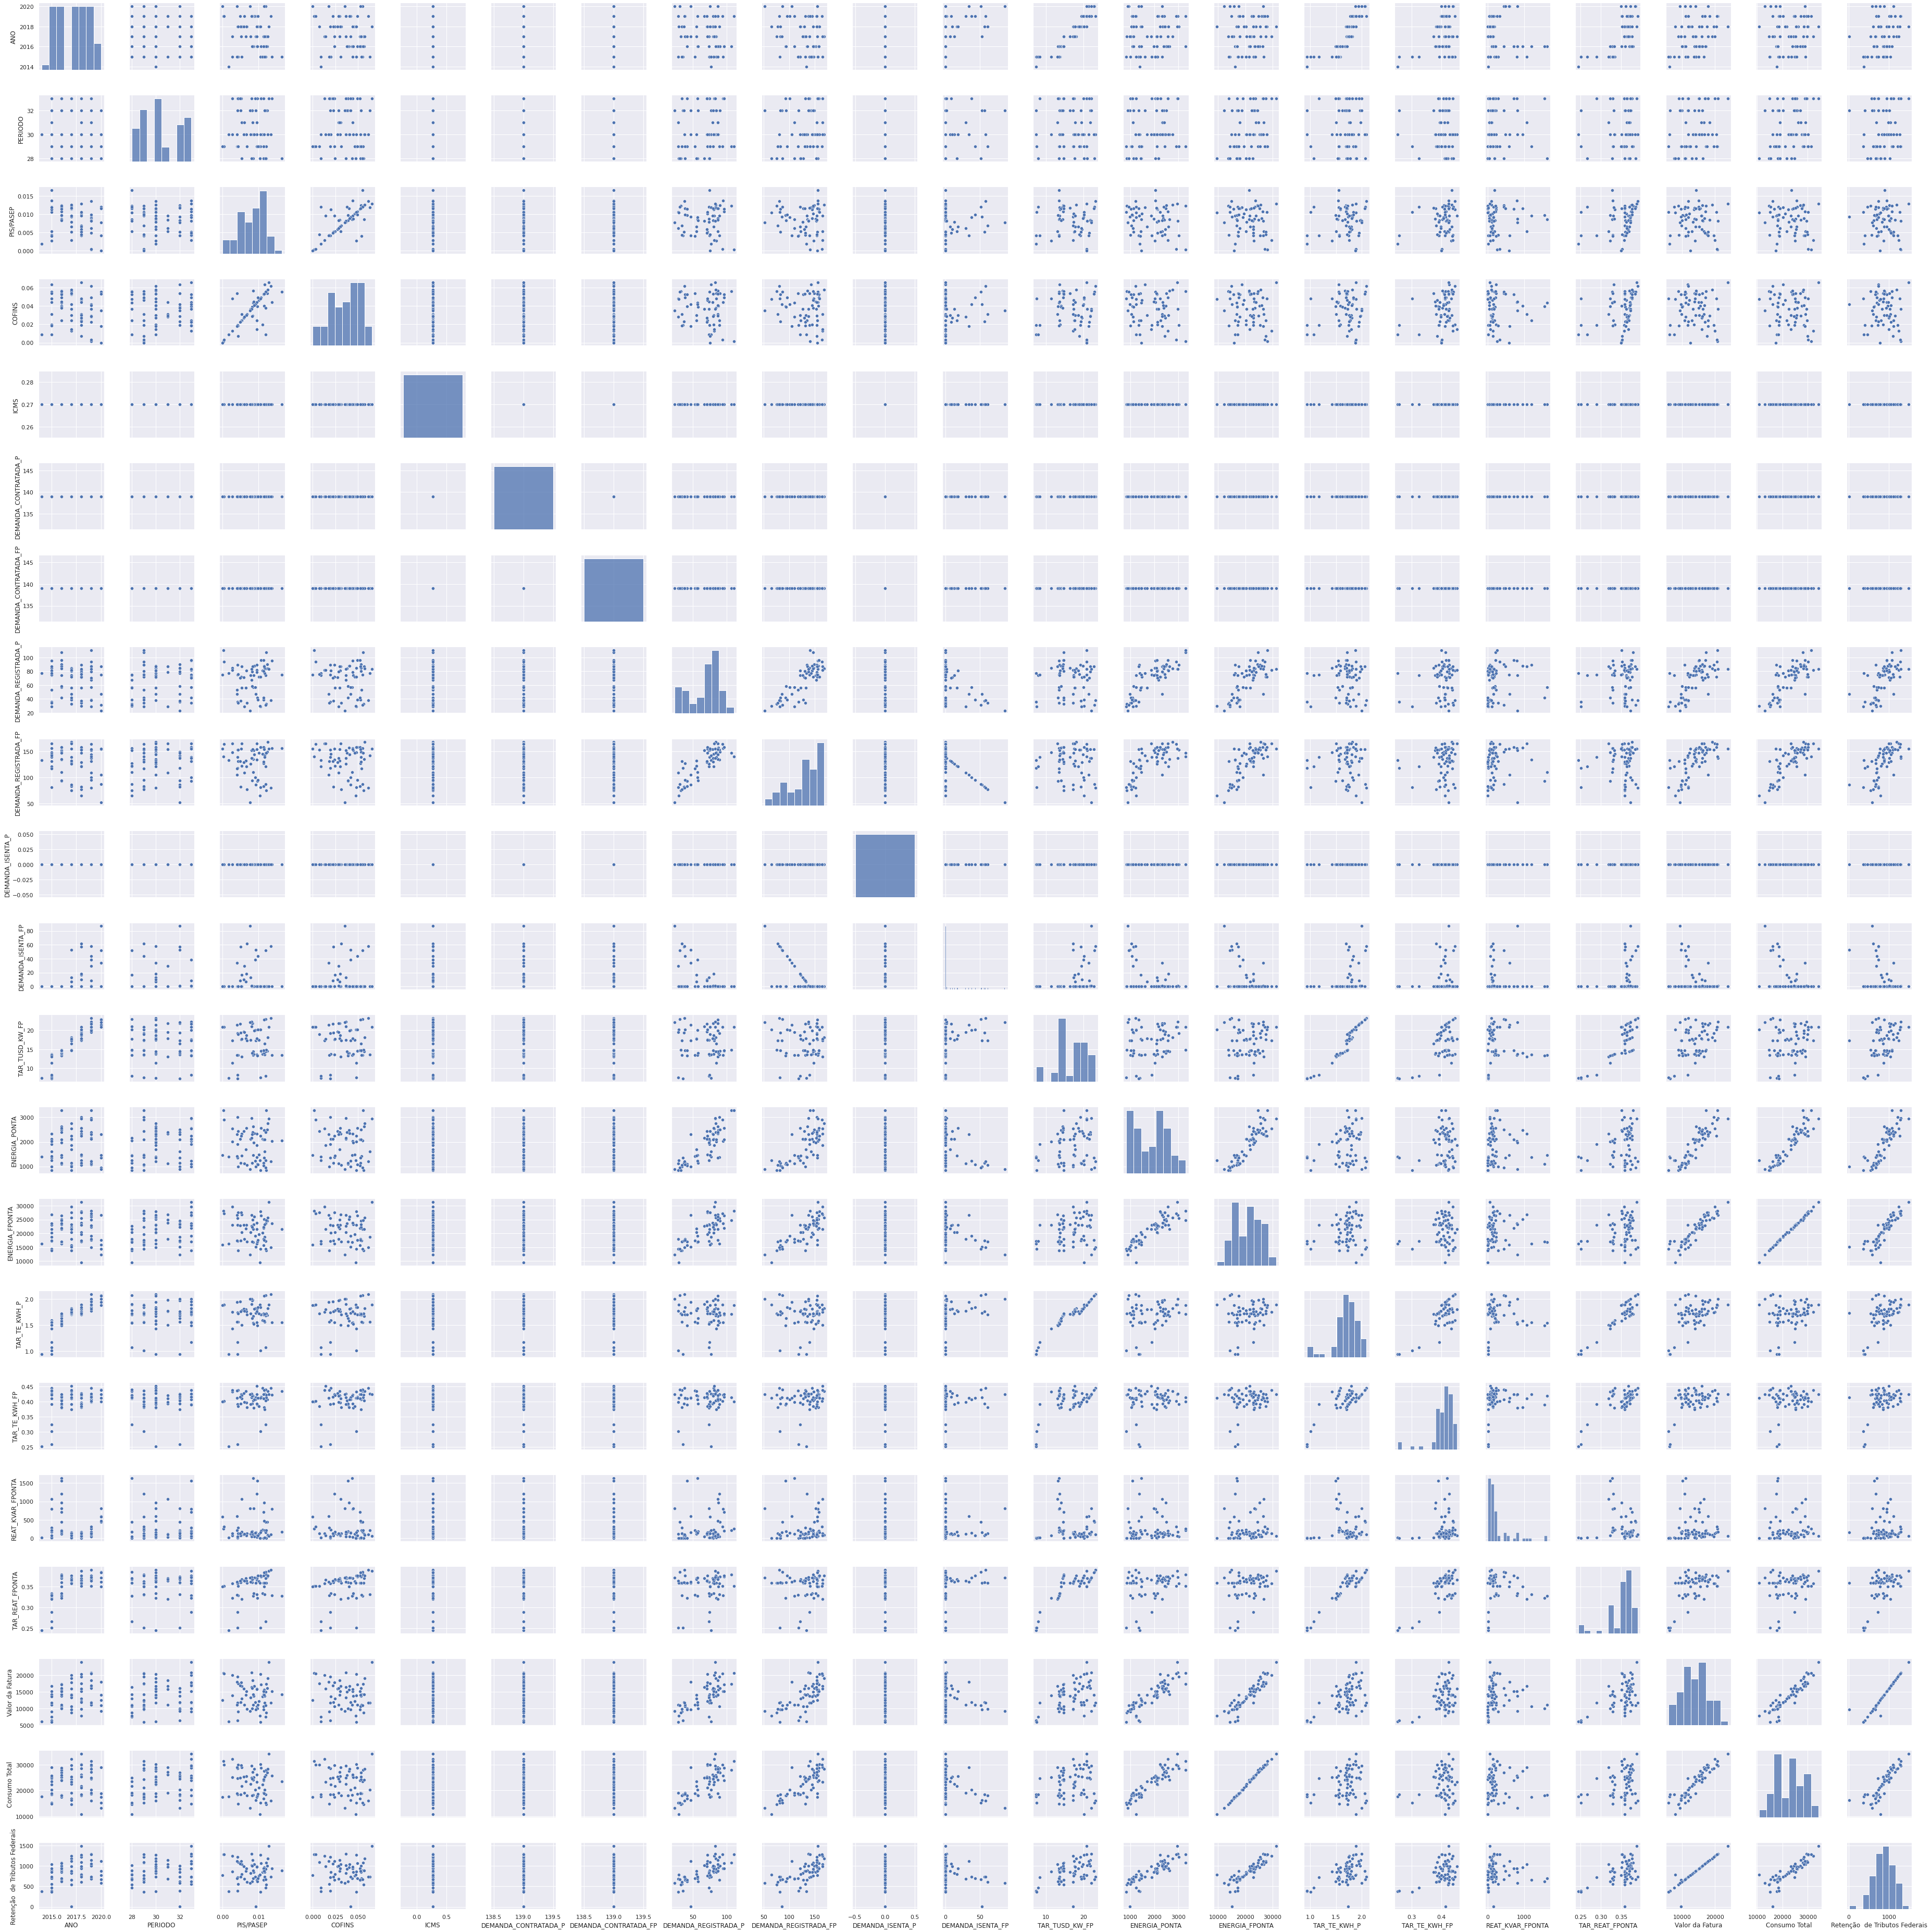

In [ ]:
sns.pairplot(UC1_KNN[3:], palette='bwr')